# DELIVERY SCHEDULE FOR TANKER LORRIES OPERATED BY SAO GAS Ltd.

_Submitted by Group - COMP7065 S1 14/09/20-24/01/21 - 7_

_1. Nishant Bhikhabhai Thaker (s5230336)_<br>
_2. Deepika Fnu (s5230008)_<br>
_3. Ashutosh Bhaskar Makone (s5224583)_<br>
_4. Nethra Viswanathan (s5227228)_<br>
_5. Santosh Kumar Bojanki (s5228237)_<br>




## DELIVERABLES

The code executes in the Google Colab environment. The below files are delivered along with this notebook:

1. SaO_Optilandia_locations.csv
2. SaO_Optilandia_links.csv
3. SaO_Optilandia_depot_lorries.json
4. Solution 2 Jupyter Notebook
7. 3 Image files for explanation


Vehicle Routing Problem is an optimization problem used in many applications in which vehicles pick up and deliver items to various customer locations. Different Vehicle Routing Problems (VRPs) can be formulated based on the requirements and constraints on route. Multiple Depot Vehicle Routing Problem is one of them where there are many depots and each vehicle can start or end its route at any one of them. The cost of delivery of the vehicles depends on the load and fuel consumption per unit distance which are the significant factors involved in cost. Delivery of goods with optimal route and for the least cost without exceeding the capacity of vehicles is required (Rodolfo et al. 2007). Optimization techniques like Genetic algorithms, Tabu search, Simulated annealing and Adaptive Large Neighborhood Search (ALNS) are some of the  metaheuristics which could be used to solve these type of problems.

##PROBLEM DEFINITION
The purpose of this paper is to plan delivery for the LPG distributor and to provide the delivery schedules for their fleet of 25 tanker lorries which are operating from four depots in the country of Optilandia. We designed an algorithm for routing of the LPG tanker lorries by minimizing the overall cost of delivery for the distributor. We are presented with 2 optimization problems as follows:
1. The only constraint in fuel delivery is that the lorries have a capacity specified for loading fuel beyond which they cannot be filled in a trip. The target is to fully fill the customers' tanks while minimising the cost.

2. Problem 2 has few more constraints in order to schedule delivery of fuel with minimum cost and maximum supply.
  * Limit in travel distance of lorries to 250 miles
  * Limit in number of stops to 5 excluding the returning depot
  * Mandatory rule that lorries need to end their journey at a depot
  * Mandatory rule that customers with less than 15% gas in their tanks need to be supplied with fuel, failing which penalty of £1000 is incurred for every unsatisfied customer.



#SOLUTION 1

##METHODOLOGY
###DATASET:
The dataset provided for the problem consists of 2 CSV files which house information about the locations in Optilandia including the coordinates of the depots, customers and connecting nodes, their tank capacity and current fuel level and the links between nodes. Lorry details , say lorry ID, capacity, cost per mile and cost per mile per tonne are provided in a JSON file. The datasets are converted into dataframes for further processing.
The problem presented is a multi-depot capacitated vehicle routing problem which requires different strategies to perform the following operations.
1.	Forming  clusters of customer nodes for each of the 4 depots 
2.	Finding the shortest route to be taken by tanker lorries for LPG delivery from every depot
3.	Planning delivery of fuel to all customers in order to fill their tanks with the least possible cost

###NETWORKX GRAPH
The notebook uses Networkx library in order to plot the graph of Optilandia with the provided location coordinates of all the nodes and Euclidean distance between every pair of coordinates calculated as a matrix using scipy library (Networkx Developers 2021). All the graphical visualizations in the notebook are presented  using NetworkX library.
###MULTI SOURCE DIJKSTRA SHORTEST PATH ALGORITHM
The algorithm is one of the strategies followed for one of the discussed operations. The multi-source Dijkstra shortest path algorithm is employed in the weighted graph to form the distinct clusters of customer nodes for multiple depots to distinct customer nodes which do not overlap (NetworkX Developers 2021a). This makes it easier to assign tanker lorries to mutually exclusive customer nodes pertaining to different depots.
###DIJKSTRA SHORTEST PATH ALGORITHMS
NetworkX function implementing Dijkstra’s shortest path algorithm dijkstra_path() provides the shortest path between a source node and destination node of a weighted graph. The technique is employed in order to find the shortest path between two customer nodes of an ordered list of customers (NetworkX Developers 2021b). 
Another shortest path algorithm implemented by NetworkX funtion all_pairs_dijkstra_path_length() returns a matrix of  the pairwise shortest path lengths between all the nodes of the Optilandia graph. The matrix is constructed to provide as input to Ant Colony optimizer which is explained in the next section (Stackoverflow 2021).
###ANT COLONY OPTIMIZATION
Ant Colony Optimization (ACO) is the optimization technique employed to solve problem 1 of the assignment which requires all customers of Optilandia to be delivered full tank of fuel with the least cost of delivery. The ACO algorithm has been chosen after experimenting the delivery scheduling by employing Genetic algorithm and greedy approach which includes nearest neighbour technique to find the shortest/best route to be followed to cover the least distance without compromising on any customer. Since ACO provided the best cost out of the 3 approaches, the same has been implemented for submission. ACO is a technique based on the real strategy followed by ants which move towards their food source by depositing a chemical substance called pheromone on their way. The subsequent ants watch the pheromone trails and moves towards the path with the most pheromone deposited considering it as the shortest path to the destination(Surana 2019) (Tan et al. 2012). The implementation in this notebook makes use of distance matrix of nodes, pheromone matrix, a heuristic matrix and a probability matrix in order to decide the next move of the ant in every step. The following equation gives the probability distribution used to choose the next move.
![picture]( https://drive.google.com/uc?id=1A6Ka9i4aai82sCKmUquQIclIBt4XfAf_)
Where Tij denotes pheromone concentrat	ion on the edge connecting nodes i and j, eta denotes 1/distance of the edge which is the heuristic value and u denotes the saving of a pair of nodes to form route instead of using both the nodes in different routes.  The constants alpha, beta and gamma indicate the bias of the influence of pheromone concentrate, heuristic value and savings/intensity value. The technique executes for the specified number of iterations and in each iteration, the specified number of ants form distinct routes out of which the best route is picked in each iteration. For every ant the pheromone matrix and probability matrix are updated for the subsequent ants to choose the appropriate route ased pheromone secretion of previous ants (Tan et al. 2012) (Mirjalili 2021).
![picture]( https://drive.google.com/uc?id=1CKd_Bm2NosVhRX-0PnGF8xM1QWLf_Ik2)
###FUEL DELIVERY PLANNING AND SCHEDULING
The result of Ant Colony optimization is fed as the input sorted customer list to the fuel delivery scheduling routine. The routine creates the actual shortest path leading to every customer in the ordered list, followed by creation of customer requirement dictionary. This is followed by delivery planning and finding the total distance and cost. Each lorry in the specified depot travels through the created best route to deliver fuel and the corresponding distance and cost are calculated and recorded. Once a lorry empties its fuel on the way, it stops in the location and the subsequent lorry continues the delivery with fuel loaded from depot. Thus all the customers are visited in either 1 complete trip or even more ultimately achieving the delivery of required fuel. The 
The delivery scheduling routine of a depot returns the path travelled by the tankers, total capacity of lorries in the depot, total fuel requirement of customers around the depot, delivery schedule with distance and cost of delivery, remaining amount of fuel required , the customers who require more fuel and the destination of the lorries at the end of the trip. The subgraph is marked with the travelled route for clarity.

Steps followed for implementation:
1.	The Euclidean distance matrix is calculated for all the provided location coordinates in order to plot the graph using Networkx library.
2.	The pairwise shortest distance matrix is computed between every pair of nodes in the graph using all_pairs_dijkstra_path_length() .
3.	Cluster of customer paths are formed around the 4 depots such that customers belonging to every depot is mutually exclusive from the other. The sugraphs are presented using Networkx library.
4.	Ant Colony algorithm is implemented for every cluster in order to fetch the best route covering all the customers in each cluster.
5.	The best route formed for each cluster is then used to plan the delivery schedule with the least possible cost using a user defined algorithm employing the required lorries where each lorry uses the best route of the cluster to deliver only the required fuel . The distance  covered and cost of delivery are also computed while scheduling the delivery.
6.	The output JSON formatted string is obtained by rearranging the delivery schedule in the required sequence.
7.	The output is then validated and verified for correctness of the distance and cost calculated.



##EXPERIMENTS AND RESULTS
Genetic Algorithm,Ant Colony Optimization and Nearest Neighbour algorithm were attempted to solve problem 1. Below are the results with the total distance travelled, the total cost of delivery and running time for the three mentioned approaches. Out of the below furnished results it could be clearly seen that Ant colony optimization outperforms the others in terms of cost as well as running time due to the implementation of early stopping mechanism and hence the same is submitted as the final solution (Berger and Barkaoui 2003) (Díaz 2021). The second best is the nearest neighbour/ greedy approach. The complete python code is given below with illustrations and discussions.

Algorithm | Distance Covered(miles) | Cost of delivery(£) | Running time(s)
--- | --- | --- | ---
Nearest Neighbour/Greedy approach | 8009 | 54669 | 13
Genetic Algorithm | 8181 | 56813 | 103
Ant Colony Algorithm | 7320 | 49764 | 29



###CODE STRUCTURE
*   Import statements
*   File Path declarations (Please follow instructions in this section to replace the project path)
*   Class definition
*   Stand alone Funtion definitions
*   Exploratory Data Analysis
*   Route Assignment to depots based on Ant Colony Optimization
*   LPG Delivery scheduling


In [ ]:
import pandas as pd
import numpy as np
import random as rn
import os
import math
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import json
import matplotlib.pyplot as plt
import operator
import time
from copy import deepcopy
from itertools import groupby 
from itertools import chain
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/gdrive')
os.environ['PYTHONHASHSEED'] = '0'
# Setting the seed for numpy-generated random numbers
np.random.seed(40)
# Setting the seed for python random numbers
rn.seed(1301)

Mounted at /content/gdrive


In [ ]:
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

The input CSV and JSON files - SaO_Optilandia_locations.csv, SaO_Optilandia_links.csv, SaO_Optilandia_depot_lorries.json need to be placed in the same folder as this notebook. **The path of the folder can be provided in the below environment variable 'PROJECT_PATH'** for successful execution of the code.

In [ ]:
os.environ['PROJECT_PATH'] = '/content/gdrive/My Drive/Colab Notebooks/SAO/Project'

###ANT COLONY OPTIMIZATION - CLASS DEFINITION

Ant Colony optimization technique has been used to generate the shortest path between each depot and the corresponding customer nodes to be visited.The algorithm works by constructing pheromone matrix, heuristic matrix and probability matrix considering the input distance matrix in order to choose the best route. Based on the alpha and beta evaporation rates, intensity factor and probability value for choosing the best route which are provided as input to the class, the matrices are updated as the ants form different routes by depositing the calculated amount of pheromone in every edge and intensifying the pheromone deposit along the best route. Every next node is chosen by an ant based on the pheromone matrix and probability matrix in order to follow the path with the most pheromone deposit. The algorithm runs for the specified number of iterations and in every iteration, the specified number of ants form distinct routes. The best route among the ants in an iteration is selected based on the distance travelled by every ant and finally the best route among the resulting best routes of ants is selected as the final shortest path which can be used by tanker lorries of the respective depots. The  algorithm stops either after complete execution of all the loops, or even earlier if the same route results for a specified number of times which is an advantage with respect to execution time (John 2021).

In [ ]:
class AntColonyOptimizer:
    def __init__(self, ants, evap_rate, intensity, alpha=1.0, beta=0.0, beta_evap_rate=0,
                 choosebest=.1):
        """
        Ant colony optimizer.  Finds either the min distance between nodes.
        :param ants: number of ants
        :param evap_rate: rate at which pheromone evaporates
        :param intensity: factor added to the best path
        :param alpha: importance of pheromone
        :param beta: importance of distance
        :param beta_evap_rate: rate at which heuristic(distance) decays
        :param choosebest: probability value to choose the best route
        """
        # Parameters
        self.ants = ants
        self.evap_rate = evap_rate
        self.pheromone_intensity = intensity
        self.heuristicalpha = alpha
        self.heuristicbeta = beta
        self.beta_evap_rate = beta_evap_rate
        self.choosebest = choosebest

        self.pheromonematrix = None
        self.heuristicmatrix = None
        self.probabilitymatrix = None

        self.dist_map = None
        self.availablenodes = None
        self.nodes=None
        self.bestseries = []
        self.best = None
        self.fitted = False
        self.bestpath = None
        self.fittime = None

        # Plotting values
        self.early_stop = False

    def __str__(self):
        string = "Ant Colony Optimizer"
        string += "\n--------------------"
        string += "\nFInds the least distance between nodes in a distance matrix."
        string += "\n--------------------"
        string += "\nNumber of ants:\t\t\t\t{}".format(self.ants)
        string += "\nPheronome evaporation rate:\t\t\t{}".format(self.evap_rate)
        string += "\nintensity:\t\t{}".format(self.pheromone_intensity)
        string += "\nAlpha Heuristic:\t\t\t{}".format(self.heuristicalpha)
        string += "\nBeta Heuristic:\t\t\t\t{}".format(self.heuristicbeta)
        string += "\nBeta Evaporation Rate:\t\t{}".format(self.beta_evap_rate)
        string += "\nChoose Best Route:\t\t{}".format(self.choosebest)
        string += "\n--------------------"
        string += "\nUSAGE:"
        string += "\nNumber of ants influences how many routes are formed each iteration."
        string += "\nThe alpha and beta heuristics affect how much importance the pheromones or the distance heuristic gains in an ants' decisions."
        string += "\nBeta evaporation reduces the influence of the heuristic over time."
        string += "\nChoose best is a percentage of how often an ant will choose the best route over choosing a route based on pheromones."
        string += "\n--------------------"
        if self.fitted:
            string += "\n\nThis optimizer has been fitted."
        else:
            string += "\n\nThis optimizer has not been fitted."
        return string

    def _initialize(self):
        """
        Initializes the model by creating matrices and generating the list of available nodes
        """
        assert self.dist_map.shape[0] == self.dist_map.shape[1], "Not a distance matrix!"
        num_nodes = len(self.nodes)
        
        self.pheromonematrix = np.ones((num_nodes, num_nodes))
        # Remove the diagonal since there is no pheromone from node i to itself
        self.pheromonematrix[np.eye(num_nodes) == 1] = 0
        self.heuristicmatrix = 1 / self.dist_map
        self.probabilitymatrix = (self.pheromonematrix ** self.heuristicalpha) * (
                self.heuristicmatrix ** self.heuristicbeta)  # element by element multiplcation
        self.availablenodes = list(range(num_nodes))

    def _reinstate_nodes(self):
        """
        Resets available nodes to all nodes for the next iteration
        """
        self.availablenodes = list(range(len(self.nodes)))

    def _update_probabilities(self):
        """
        Updating probability matrix
        """
        self.probabilitymatrix = (self.pheromonematrix ** self.heuristicalpha) * (
                self.heuristicmatrix ** self.heuristicbeta)

    def _choose_next_node(self, from_node):
        """
        Chooses the next node based on probabilities.  If p < choosebest, then the best path is chosen, otherwise
        it is selected from a probability distribution.
        :from_node: the source node of ant
        :return: index of the target node of the ant
        """
        numerator = self.probabilitymatrix[from_node, self.availablenodes]
        if np.random.random() < self.choosebest:
            next_node = np.argmax(numerator)
        else:
            denominator = np.sum(numerator)
            probabilities = numerator / denominator
            next_node = np.random.choice(range(len(probabilities)), p=probabilities)
        return next_node

    def _remove_node(self, node):
        self.availablenodes.remove(node)

    def _evaluate(self, paths):
        """
        Evaluates the best route of the ants by adding up the distances between nodes.
        :param paths: solutions from the ants
        :return: the best node pair as a tuple, the best path, and the best score
        """
        scores = np.zeros(len(paths))
        node_i = []
        node_j = []
        for index, path in enumerate(paths):
            score = 0
            n_i = []
            n_j = []
            for i in range(len(path) - 1):
                n_i.append(path[i])
                n_j.append(path[i + 1])
                score += self.dist_map[path[i], path[i + 1]]
                #score += dist_graph[self.nodes[path[i]], self.nodes[path[i+1]]]
            scores[index] = score
            node_i.append(n_i)
            node_j.append(n_j)
        
        best = np.argmin(scores)
        return (node_i[best], node_j[best]), paths[best], scores[best]

    def _evaporation(self):
        """
        Evaporate some pheromone as the inverse of the evaporation rate.  Also evaporates beta if desired.
        """
        self.pheromonematrix *= (1 - self.evap_rate)
        self.heuristicbeta *= (1 - self.beta_evap_rate)

    def _intensify(self, best_pair):
        """
        Increases the pheromone by a factor for the best route.
        :param best_pair: i and j nodes of the best route
        """
        i = best_pair[0]
        j = best_pair[1]
        self.pheromonematrix[i, j] += self.pheromone_intensity

    def fit(self, dist_map_matrix, nodes, iterations=100, early_stopping_count=20, verbose=True):
        """
        Fits the ACO to a specific dist_map. 
        :param dist_map_matrix: Distance matrix of nodes
        :param iterations: number of iterations
        :param early_stopping_count: numer of repetitive score to decide on early stopping
        :return: the best cost and path
        """
        if verbose: print("Beginning Ant Colony Optimization with {} iterations:".format(iterations))
        self.dist_map = dist_map_matrix
        self.nodes= nodes
        start = time.time()
        self._initialize()
        num_equal = 0

        for i in range(iterations):
            start_iter = time.time()
            paths = []
            path = []

            for ant in range(self.ants):
                start_node= 0
                current_node=start_node
                while True:
                    path.append(current_node)
                    self._remove_node(current_node)
                    if len(self.availablenodes) != 0:
                        current_node_index = self._choose_next_node(current_node)
                        current_node = self.availablenodes[current_node_index]
                    else:
                        break

                self._reinstate_nodes()
                paths.append(path)
                path = []
            bestpath_pairs, bestpath, best_score = self._evaluate(paths)

            if i == 0:
                best_score_so_far = best_score
            else:

                if best_score < best_score_so_far:
                    best_score_so_far = best_score
                    self.bestpath = bestpath
                    num_equal = 0 #chk
              
            if best_score == best_score_so_far:
                num_equal += 1
                self.bestpath = bestpath
            # else:
            #     num_equal = 0
                

            self.bestseries.append(best_score)
            self._evaporation()
            self._intensify(bestpath_pairs)
            self._update_probabilities()

            if verbose: print("Best distance/cost in iteration {}: {}; bestpath: {}; overall: {} ({}s)"
                              "".format(i, round(best_score, 2), bestpath, round(best_score_so_far, 2),
                                        round(time.time() - start_iter)))
            #print(num_equal)
            if best_score == best_score_so_far and num_equal == early_stopping_count:
                self.early_stop = True
                print("Stopping early due to {} iterations of the same cost.".format(early_stopping_count))
                break

        self.fittime = round(time.time() - start)
        self.fitted = True

        self.best = self.bestseries[np.argmin(self.bestseries)]
        if verbose: print(
            "ACO executed.  Runtime: {} minutes.  Best cost: {}, Best Path: {}".format(self.fittime // 60, self.best, self.bestpath))
        return self.best, self.bestpath


    def plot(self):
        """
        Plots the distance/cost over time after the model has been fitted.
        :return: None if the model isn't fitted yet
        """
        if not self.fitted:
            print("Ant Colony Optimizer not fitted!!!!")
            return None
        else:
            fig, ax = plt.subplots(figsize=(10, 7))
            ax.plot(self.bestseries, label="Best Run")
            ax.set_xlabel("Iteration")
            ax.set_ylabel("Distance/Cost")
            ax.text(.8, .6,
                    'Ants: {}\nEvap_Rate: {}\nIntensity: {}\nAlpha: {}\nBeta: {}\nBeta_Evap: {}\nChoose Best: {}\n\nFitTime: {}m{}'.format(
                        self.ants, self.evap_rate, self.pheromone_intensity, self.heuristicalpha,
                        self.heuristicbeta, self.beta_evap_rate, self.choosebest, self.fittime // 60,
                        ["\nEarly Stopping!" if self.early_stop else ""][0]),
                    bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 10}, transform=ax.transAxes)
            ax.legend()
            plt.title("ACO Results (best: {})".format(np.round(self.best, 2)))
            plt.show()



### FUNCTION DEFINITIONS

Functions have been created for every action for modularity and readability of code. The same have been invoked whenever required in the LPD delivery scheduling code. Below are the function definitions of the project:

In [ ]:
def show_network():
  plt.figure(figsize=(20,10))
  nx.draw(G,with_labels=False,pos=pos,node_size=50)
  nx.draw_networkx_nodes(G,pos,nodelist=depot_loc_ids,node_color='r',node_size=600,alpha=1);
  nx.draw_networkx_labels(G,pos,{k:k for k in depot_loc_ids});
  nx.draw_networkx_nodes(G,pos,nodelist=cust_loc_ids,node_color='g',node_size=100,alpha=1);

The below function filters the customer nodes when given a list of nodes and a depot as input.

In [ ]:
#Given a set of nodes and a depot, the function filters the customer nodes

def findCustomerNodes(depot, nodes):
  cnt=0
  custnodes=[depot]
  for i in nodes:
    if i in cust_loc_ids:
      custnodes.append(i)
  return custnodes

The below function gives the complete shortest path including the non-customer nodes for the input sorted list of customer nodes which is formed by the ant colony algorithm.

In [ ]:
def makesortedPathList(depot, sortedCustomers,G):
    pathFinal=[depot]
    for i in range(len(sortedCustomers)-1):
        p=nx.dijkstra_path(G, sortedCustomers[i], sortedCustomers[i+1])
        #print('path to', sortedCustomers[i+1], ':', p)
        pathFinal.extend(p[1:])
    return pathFinal

Given the sorted customer list, the below function creates a dictionary of customer edges with distance and fuel requirement.

In [ ]:
#The function returns a dictionary of customer edges with distance and fuel requirement & filled status

def createSerialcustLorryDict(depot, sortedCustomers):
  custDetails=dict()
  for i in range(len(sortedCustomers)-1):
    if sortedCustomers[i+1] in cust_loc_ids:   
      custDetails[i]=[depot, sortedCustomers[i], sortedCustomers[i+1], dist_graph[sortedCustomers[i], sortedCustomers[i+1]], df_loc[df_loc.id==sortedCustomers[i+1]]['emptiness'].item()- df_loc[df_loc.id==sortedCustomers[i+1]]['filled'].item()]
  custDetailsCopy = deepcopy(custDetails)

  return custDetails, custDetailsCopy

The below function draws the graph of Optilandia with the marking of 4 different paths taken by tanker lorries corresponding to the 4 depots given in the problem.

In [ ]:
def drawFullGraph():
  show_network()
  ed=[]
  ed.append(list(zip(path116Final, path116Final[1:])))
  for edge in ed:
    nx.draw_networkx_edges(
      G,
      pos,
      edgelist=list(edge),
      alpha=1,
      edge_color='r',
      width=10.0
    )
  ed=[]
  ed.append(list(zip(path124Final, path124Final[1:])))
  for edge in ed:
    nx.draw_networkx_edges(
      G,
      pos,
      edgelist=list(edge),
      alpha=1,
      edge_color='g',
      width=10.0
    )
  ed=[]
  ed.append(list(zip(path373Final, path373Final[1:])))
  for edge in ed:
    nx.draw_networkx_edges(
      G,
      pos,
      edgelist=list(edge),
      alpha=1,
      edge_color='b',
      width=10.0
    )
  ed=[]
  ed.append(list(zip(path523Final, path523Final[1:])))
  for edge in ed:
    nx.draw_networkx_edges(
      G,
      pos,
      edgelist=list(edge),
      alpha=1,
      edge_color='y',
      width=10.0
    )
  ed=[]
  ed.append(list(zip(pathRem116, pathRem116[1:])))
  for edge in ed:
    nx.draw_networkx_edges(
      G,
      pos,
      edgelist=list(edge),
      alpha=1,
      edge_color='orange',
      width=10.0
    )

The below function draws the subgraph of the route covered around the specified depot.

In [ ]:
#The function draws a graph to mark the shortest possible paths taken over the superset nodes
def drawGraph(G, depot, nodes, pathFinal):
    G1=G.subgraph(nodes)
    plt.figure(figsize=(20,10))
    nx.draw(G1,with_labels=False,pos=pos,node_size=400)
    nx.draw_networkx_nodes(G1,pos,nodelist=[depot],node_color='r',node_size=600,alpha=1);
    nx.draw_networkx_labels(G1,pos,{k:k for k in nodes});
    nx.draw_networkx_nodes(G1,pos,nodelist={k: k for k in cust_loc_ids if k not in [depot] and k in nodes},node_color='g',node_size=600,alpha=1);
    ed=[]
    ed.append(list(zip(pathFinal, pathFinal[1:])))
    for edge in ed:
      nx.draw_networkx_edges(
        G1,
        pos,
        edgelist=list(edge),
        alpha=1,
        edge_color='r',
        width=10.0
    )
        
    return G1

The below function returns the total capacity of all lorries pertaining to the specified depot and fuel requirement of the customers around the depot. This helps in deciding if a second trip will be required for any of the tanker lorries.

In [ ]:
# To check total capacity of a depot vs requirement of customers surrounding the depot

def checkTotalCapacityVsRequirement(depot, custDetails, sumCapacity=0):
  #Total capacty of lorries starting from depot 116
  if sumCapacity==0:
    totalLorryCapacity=pdjson[pdjson.lorryID==str(depot)]['capacity'].sum()
  else:
    totalLorryCapacity=sumCapacity
  #Total fuel requirement of the nearest neighbours of depot 116
  totalFuelRequirement=0
  for node in custDetails.keys():
    if custDetails[node][4]!=-99:
      totalFuelRequirement=totalFuelRequirement+custDetails[node][4]
  return totalLorryCapacity, totalFuelRequirement

In [ ]:
#To find previous key of lorry dictionary
def findPreviousKey(lorryDict, customer, lorry_id):
  test_key = (customer, lorry_id)  
  temp = list(lorryDict) 
  try: 
      res = temp[temp.index(test_key) - 1] 
  except (ValueError, IndexError): 
      res = None
  return res

The below function plays a major role in the project since the complete delivery schedule is planned considering the customer distances and requirement around the specified depot. The algorithm picks each lorry in the input depot in the descending order of capacity and starts filling the tanks of every customer around the depot based on the requirement in the input customer details dictionary. The customer location dataframe and the customer details dictionary are also updated with the filled fuel values which helps in constructing the LPG schedule dictionary for the final output. The algorithm also computes the cost of delivery based on the distance, cost per mile and cost per mile per tonne.

In [ ]:
#The function contains the complete delivery plan and takes in customer details dict and total fuel requirement value as input

def planDelivery(depot, custDetails, totalFuelRequirement):
  lorry=dict()
  flag=0
  lorryDest=dict()
  i=0
  startfromcust=custDetails[0][2]
  for lorry_id in pdjson[pdjson.lorryID==str(depot)]['lorry_id'].values:
    capacity=pdjson.loc[pdjson.lorry_id==lorry_id,'capacity'].item()
    lorryQuantity=totalFuelRequirement+0.01 if totalFuelRequirement<=capacity else capacity
    lorryCpm=pdjson.loc[pdjson.lorry_id==lorry_id,'cpm'].item()
    lorryCptm=pdjson.loc[pdjson.lorry_id==lorry_id,'cptm'].item()
    depot_cust_dist=dist_graph[depot][startfromcust]   
    if depot_cust_dist !=0:
      depot_cust_cost=depot_cust_dist*(lorryCpm + ((lorryQuantity)* lorryCptm))
      lorry[(startfromcust, lorry_id+"-depot")]=[lorry_id, capacity, 0, lorryQuantity, 0, 0]
    sum=0
    for item in custDetails.keys():    
      lorryFilled=pdjson.loc[pdjson.lorry_id==lorry_id,'delivered'].item()
      custRequirement=df_loc.loc[df_loc.id==custDetails[item][2],'emptiness'].item()
      custFilled=df_loc.loc[df_loc.id==custDetails[item][2],'filled'].item()
      custDistance=custDetails[item][3]
      lorryRemainingfuel= lorryQuantity - lorryFilled
      custUpdatedrequirement= custRequirement - custFilled
      if lorryQuantity==lorryFilled:
        startfromcust=custDetails[item-1][2]        
        break;
      quantityCarried=round(lorryQuantity,2)
      if lorryRemainingfuel >= custUpdatedrequirement:
        if custRequirement > custFilled:                
          lorry[(custDetails[item][2], lorry_id)]=[lorry_id, capacity, custUpdatedrequirement, quantityCarried, custDistance, 0]
          res=findPreviousKey(lorry, custDetails[item][2], lorry_id)            
          quantityCarried= round(lorry[res][3] - lorry[res][2], 2)
          custCost=custDistance*(lorryCpm + ((quantityCarried)* lorryCptm))
          lorry[(custDetails[item][2], lorry_id)][3]=quantityCarried
          lorry[(custDetails[item][2], lorry_id)][-1]=round(custCost, 2)
          pdjson.loc[pdjson.lorry_id==lorry_id, 'delivered']= lorryFilled+ (custUpdatedrequirement)
          df_loc.loc[df_loc.id==custDetails[item][2], 'filled']= df_loc.loc[df_loc.id==custDetails[item][2], 'filled'].item()+ custUpdatedrequirement
          custDetails[item].append(lorry_id)
          custDetails[item].append(custUpdatedrequirement)
          if flag==1:
            custDetails[item].append(df_loc.loc[df_loc.id==custDetails[item][2],'filled'].item())
            flag=0
      else:
        if custRequirement > custFilled:
          flag=1            
          lorry[(custDetails[item][2], lorry_id)]=[lorry_id, capacity, lorryRemainingfuel, quantityCarried, custDistance, 0]
          res=findPreviousKey(lorry, custDetails[item][2], lorry_id)            
          quantityCarried= round(lorry[res][3] - lorry[res][2], 2)
          custCost= custDistance*(lorryCpm + ((quantityCarried)* lorryCptm)) 
          lorry[(custDetails[item][2], lorry_id)][-1]=round(custCost, 2)
          lorry[(custDetails[item][2], lorry_id)][3]=quantityCarried
          pdjson.loc[pdjson.lorry_id==lorry_id, 'delivered']= lorryFilled+ (lorryRemainingfuel)
          df_loc.loc[df_loc.id==custDetails[item][2], 'filled']= df_loc.loc[df_loc.id==custDetails[item][2], 'filled'].item()+ lorryRemainingfuel
          custDetails[item].append(lorry_id)
          custDetails[item].append(df_loc.loc[df_loc.id==custDetails[item][2], 'filled'].item())
      if (custDetails[item][2], lorry_id+"-depot") in lorry.keys():      
        
        lorry[(custDetails[item][2], lorry_id)][4]=dist_graph[depot][custDetails[item][2]]
        lorry[(custDetails[item][2], lorry_id)][3]=round(lorryQuantity,2)
        lorry[(custDetails[item][2], lorry_id)][5]= lorry[(custDetails[item][2], lorry_id)][4]*(lorryCpm + ((lorryQuantity)* lorryCptm))   
                 
      if lorryRemainingfuel >0:
        lorryDest[lorry_id]=custDetails[item][2]      
      sum=sum+custDetails[item][-1]

    if sum==totalFuelRequirement:
      break;

  return lorry, custDetails, lorryDest
        


The below function computes the total distance and cost from the delivery schedule dictionary which results from the delivery planning routine discussed earlier.

In [ ]:
def findTotalDistanceCost(deliveryDetails):
    distSum=0
    costSum=0
    for (x,y) in deliveryDetails.keys():
      distSum=distSum+ deliveryDetails[(x,y)][4]
      costSum=costSum+ deliveryDetails[(x,y)][5]
    return distSum, costSum

On completion of the first trip by all tanker lorries in a depot, the below function checks any further fuel requirement around the depot. The function returns the total amount of fuel required and also the amount of fuel required by each of the remaining customers in a dictionary.

In [ ]:
def findFuelRequirement(depot, custDetails):
  fuelRequired=dict()
  for item in custDetails.keys():
    if custDetails[item][4] != custDetails[item][-1]:
      fuelRequired[custDetails[item][2]]=[depot,custDetails[item][4]-custDetails[item][-1]]
    if len(custDetails[item])<=5:
      fuelRequired[custDetails[item][2]]=[depot,custDetails[item][4]]
  
  sum=0
  for x in fuelRequired.keys():
    sum=sum+fuelRequired[x][1]
  return sum, fuelRequired

The below function is the delivery execution function which invokes the already discussed functions in an orderly manner in order to achieve efficient delivery of LPG with the least possible cost. The result of Ant Colony optimization is fed as the input sorted customer list to be visited for fuel delivery. The function then goes on to create the actual shortest path leading to every node int the list of customers, followed by creation of customer requirement dictionary. This is followed by delivery planning and finding the total distance and cost. Finally the remaining fuel requirement is calculated. All the discussed values are computed and returned by the function.

In [ ]:
#The main function which invokes all other functions for delivery execution

def ExecuteDelivery(depot, G, custnodes, sumCapacity=0):
  pathFinal=[]
  visited=custnodes
  pathFinal=makesortedPathList(depot, visited,G)
  custDetails, custDetailsprev= createSerialcustLorryDict(depot, visited)
  totalLorryCapacity, totalFuelRequirement= checkTotalCapacityVsRequirement(depot, custDetails, sumCapacity)
  deliveryDetails, updatedCustDetails, dest= planDelivery(depot, custDetails, totalFuelRequirement)
  distSum, costSum= findTotalDistanceCost(deliveryDetails)
  fuelRequired=dict()
  remainingFuelRequired=0
  remainingFuelRequired, fuelRequired=findFuelRequirement(depot, custDetails)
  return pathFinal, visited, custDetailsprev, totalLorryCapacity, totalFuelRequirement, updatedCustDetails, deliveryDetails, dest, distSum, costSum, remainingFuelRequired, fuelRequired

In [ ]:
#The function fills fuel in required lorries in case of fuel requirement after 1st round of delivery by all lorries.

def fillRequiredLorries(depot, remainingFuelRequired):
  backtodepot=dict()
  sumCapacity=0
  for lorry_id in pdjson[pdjson.lorryID==str(depot)]['lorry_id'].values:
    sumCapacity=sumCapacity+ pdjson[pdjson.lorry_id==lorry_id]['capacity'].item()
    
    pdjson.loc[pdjson.lorry_id==lorry_id, 'delivered']=0
    disttoDepot=dist_graph[dest[lorry_id]][depot]
    costtoDepot= disttoDepot*(pdjson[pdjson.lorry_id==lorry_id]['cpm'].item())
    backtodepot[(dest[lorry_id], lorry_id+"-to-depot")]=[lorry_id, pdjson[pdjson.lorry_id==lorry_id]['capacity'].item(),0, 0, disttoDepot, costtoDepot ]
    if sumCapacity>= remainingFuelRequired:  
      break;
    else:
      continue;       
  return sumCapacity, backtodepot

The below function prints the delivery schedule dictionary in the required output format.

In [ ]:
def printResult(depot, deliveryDetails):
  result=[]
  resultDict=dict()
  
  for (cust, lorry), value in deliveryDetails.items(): 
    loc=[]
    if '-depot' in lorry:
      loc.extend([depot, deliveryDetails[(cust, lorry)][3]])
      lorr="-".join(lorry.split("-", 2)[:2])
    elif '-to-depot' in lorry:
      loc.extend([depot, 0])
      lorr= "-".join(lorry.split("-", 2)[:2])
    else:
      loc.extend([cust, -deliveryDetails[(cust, lorry)][2]])
      lorr=lorry
    result.append({'lorry_id': lorr,"loc": loc})
  return result


In [ ]:
def sortByID(elem):
    return elem["lorry_id"]

The below function computes the distance and cost from the output json content as part of validation. 

In [ ]:
#Output validatin and cost calculation:

def findJsonDistanceAndCost(lorry_id, loc, cpm, cptm):
  depot=loc[0][0]
  quantity=loc[0][1]
  totalDist=0
  totalCost=0
  for i in range(len(loc)-1):
    distance=dist_graph[loc[i][0], loc[i+1][0]]
    if loc[i][1] >=0:
      quantity=loc[i][1]
      cost=(distance*(cpm+ (quantity * cptm)))
      #print('+quantity:', quantity, 'node:', loc[i][0], ',',loc[i+1][0],'distance:', distance, 'cost:', cost)
      #print(distance, '* (',cpm,'+(', quantity, '*', cptm, '))' ) 
    else:
      quantity=quantity+ loc[i][1]
      cost=(distance*(cpm+ (quantity * cptm)))
      #print('quantity:', quantity, 'node:', loc[i][0], ',',loc[i+1][0],'distance:', distance, 'cost:', cost)      
      #print(distance, '* (',cpm,'+(', quantity, '*', cptm, '))' ) 
      
    totalDist=totalDist+distance
    totalCost=totalCost+cost

  return totalDist, totalCost



The below function performs validation of the output JSON content to check if all the customers are served by the LPG tanker lorries and if their tanks are filled. The function invokes the cost calculation routine for every depot listed in the output content and returns the distance and cost details along with the validation result.

In [ ]:
def ValidateAndCalcCost(flattened_result):
  totalValDist=0
  totalValCost=0
  for lorry in flattened_result:
    cpm=pdjson[pdjson.lorry_id==lorry['lorry_id']]['cpm'].item()
    cptm=pdjson[pdjson.lorry_id==lorry['lorry_id']]['cptm'].item()
    capacity= pdjson[pdjson.lorry_id==lorry['lorry_id']]['capacity'].item()
    ValDist, ValCost=findJsonDistanceAndCost(lorry['lorry_id'], lorry['loc'], cpm, cptm)
    print('distance for ',lorry['lorry_id'],':', ValDist)
    print('Cost of',lorry['lorry_id'],':', ValCost)
    totalValDist=totalValDist+ValDist
    totalValCost=totalValCost+ValCost
  
#Number of customers
  cnt=0
  for lorry in flattened_result:
    for j in range(len(lorry['loc'])):
      if lorry['loc'][j][0] in depot_loc_ids:
        continue;
      else:
        cnt=cnt+1
  print('cnt:', cnt)
  if (cnt>=123):
    validity='All customers are visited'
  else:
    validity='Some customers are not visited'


  #Fuel Requirement:
  FuelRequirement=df_loc[df_loc.is_customer==True]['emptiness'].sum()
  sum=0
  for lorry in flattened_result:
    for j in range(len(lorry['loc'])):
      if lorry['loc'][j][0] in depot_loc_ids:
        continue;
      else:
        sum=sum-lorry['loc'][j][1]
  print('sum:', sum)
  print('Req:', FuelRequirement)
  if (round(sum,2)==round(FuelRequirement,2)):
    validity=validity+', Total fuel Requirement is met'
  else:
    validity=validity+', Fuel Requirement is NOT met'
  return totalValDist, totalValCost, validity

### EXPLORATORY DATA ANALYSIS

The dataset of locations in Optilandia, links between nodes and tanker lorry details are analysed for inconsistencies in data and calculation of emptiness of customer tanks and such other parametrs required for the problem.

#### Loading links into a dataframe

In [ ]:
df_link = pd.read_csv(os.path.join(os.environ['PROJECT_PATH'],'SaO_Optilandia_links.csv'))
print('shape:',df_link.shape,'\n')
#Null check
print('Null count:\n',df_link.isnull().sum(),'\n')
#Dropping NA rows
df_link.dropna(axis=0,inplace=True)
print('shape:',df_link.shape,'\n')
#no duplicates
print('Duplicate count:\n', df_link.duplicated().sum(),'\n')
df_link.drop_duplicates(inplace=True)
df_link.reset_index(inplace=True,drop=True)
print('shape:',df_link.shape,'\n')
# All links given are only one way - Two way links are not given in excel
print('id1>id2:\n',df_link.loc[df_link.id1>=df_link.id2].count(),'\n')
#No negative values for IDs
print('id1, id2 <0 :\n',df_link.loc[(df_link.id1<0) | (df_link.id2<0)].count(),'\n')

shape: (1176, 2) 

Null count:
 id1    0
id2    0
dtype: int64 

shape: (1176, 2) 

Duplicate count:
 0 

shape: (1176, 2) 

id1>id2:
 id1    0
id2    0
dtype: int64 

id1, id2 <0 :
 id1    0
id2    0
dtype: int64 



#### Loading all locations into a dataframe

An additional column is also  included in the dataframe to record the filled fuel value.

In [ ]:
df_loc=pd.read_csv(os.path.join(os.environ['PROJECT_PATH'],'SaO_Optilandia_locations.csv') )
print(df_loc.shape,'\n')

#Null check - 511 capacities and levels are NULL
print('Null count:\n',df_loc.isnull().sum(),'\n')

#Confirming that the above NULLS are for non customers
print('Nulls in customers:\n',df_loc.loc[df_loc.is_customer==True].isnull().sum(),'\n')

#no duplicates
print('Duplicates:\n',df_loc.duplicated().sum(),'\n')

#No negative values for ID, x,y
print('ID, x, y <0: \n',df_loc.loc[(df_loc.id<0) | (df_loc.x<0) | (df_loc.y<0)],'\n')

#No negative values for capacity - only customers
print('capacity < 0 for customers:\n',df_loc[(df_loc.is_customer==True) & (df_loc.capacity<0)],'\n')

#No negative values for Level - only customers
print('level < 0:\n',df_loc[(df_loc.is_customer==True) & (df_loc.level<0)],'\n')

#Depots
print('depots:\n',df_loc.loc[df_loc.is_depot==True],'\n')

#Customers
print('customer dataframe: \n',df_loc.loc[df_loc.is_customer==True],'\n')

#NO entries for nodes which are customers as well as depots - Valid
print('customer being depot:\n',df_loc.loc[(df_loc.is_customer==True) & (df_loc.is_depot==True) ],'\n')

#non depot and non customer nodes : connecting nodes
print('Connecting nodes:\n',df_loc.loc[(df_loc['is_depot']==False) & (df_loc['is_customer']==False)],'\n')

#Calculating emptiness
df_loc['emptiness']=df_loc['capacity'] - df_loc['level']
df_loc['emptinessP']=df_loc['emptiness']/df_loc.capacity*100
print('After adding emptiness:\n',df_loc[df_loc.is_customer==True].head() ,'\n')
df_loc.reset_index(inplace=True)
#Setting new header for customer locations
df_loc['filled']=0
print('After adding filled column:\n', df_loc.head(10), '\n')

(634, 7) 

Null count:
 id               0
x                0
y                0
is_depot         0
is_customer      0
capacity       511
level          511
dtype: int64 

Nulls in customers:
 id             0
x              0
y              0
is_depot       0
is_customer    0
capacity       0
level          0
dtype: int64 

Duplicates:
 0 

ID, x, y <0: 
 Empty DataFrame
Columns: [id, x, y, is_depot, is_customer, capacity, level]
Index: [] 

capacity < 0 for customers:
 Empty DataFrame
Columns: [id, x, y, is_depot, is_customer, capacity, level]
Index: [] 

level < 0:
 Empty DataFrame
Columns: [id, x, y, is_depot, is_customer, capacity, level]
Index: [] 

depots:
       id           x          y  is_depot  is_customer  capacity  level
116  116  49804.1667  6253.8889      True        False       NaN    NaN
124  124  49955.8333  5924.7222      True        False       NaN    NaN
373  373  49616.3889  5990.2778      True        False       NaN    NaN
523  523  49581.9444  6226.6667      Tr

The total number of customers is recorded here to ensure fuel delivery.

In [ ]:
#lorry has to deliver fuel to fill tanks of 123 customers
df_loc[(df_loc.is_customer==True) & (df_loc.emptiness>0)].count()

index          123
id             123
x              123
y              123
is_depot       123
is_customer    123
capacity       123
level          123
emptiness      123
emptinessP     123
filled         123
dtype: int64

#### Tanker lorry details into dataframe

In [ ]:
file=open(os.path.join(os.environ['PROJECT_PATH'],'SaO_Optilandia_depot_lorries.json'))
depot_lorries=json.load(file)
file.close()
depot_lorries

{'116': [{'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '116-0'},
  {'capacity': 12, 'cpm': 1.5, 'cptm': 1.0, 'lorry_id': '116-1'}],
 '124': [{'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '124-0'},
  {'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '124-1'},
  {'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '124-2'},
  {'capacity': 12, 'cpm': 1.5, 'cptm': 1.0, 'lorry_id': '124-3'},
  {'capacity': 12, 'cpm': 1.5, 'cptm': 1.0, 'lorry_id': '124-4'},
  {'capacity': 12, 'cpm': 1.5, 'cptm': 1.0, 'lorry_id': '124-5'},
  {'capacity': 22, 'cpm': 2.0, 'cptm': 0.5, 'lorry_id': '124-6'},
  {'capacity': 22, 'cpm': 2.0, 'cptm': 0.5, 'lorry_id': '124-7'}],
 '373': [{'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '373-0'},
  {'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '373-1'},
  {'capacity': 5, 'cpm': 1.0, 'cptm': 1.5, 'lorry_id': '373-2'},
  {'capacity': 12, 'cpm': 1.5, 'cptm': 1.0, 'lorry_id': '373-3'},
  {'capacity': 12, 'cpm': 1.5, 'cptm': 1.0, 'lorry_id': '373

The lorry details JSON file is converted into dataframe for further processing. An additional column is included here as well in order to record the fuel delivered by each lorry.

In [ ]:
#Converting json to dataframe

pdjson= pd.DataFrame(columns = ['lorry_id' , 'capacity', 'cpm' , 'cptm']) 
for _,it in depot_lorries.items():  
  pdjson=pdjson.append(it)
pdjson1=pdjson['lorry_id'].str.split("-", n=1, expand=True)
pdjson['lorryID']=pdjson1[0]
pdjson['ID']=pdjson1[1]
pdjson=pdjson[['lorry_id','lorryID','ID','capacity','cpm','cptm']]
pdjson.sort_values(by=['lorryID','capacity'], ascending=[True, False], inplace=True)
#pdjson.sort_values(by=['lorryID','capacity'], ascending=[True, True], inplace=True)
pdjson = pdjson.reset_index(drop=True)
#Setting new header for lorries
pdjson['delivered']=0
pdjson.head(25)

,lorry_id,lorryID,ID,capacity,cpm,cptm,delivered
0,116-1,116,1,12,1.5,1.0,0
1,116-0,116,0,5,1.0,1.5,0
2,124-6,124,6,22,2.0,0.5,0
3,124-7,124,7,22,2.0,0.5,0
4,124-3,124,3,12,1.5,1.0,0
5,124-4,124,4,12,1.5,1.0,0
6,124-5,124,5,12,1.5,1.0,0
7,124-0,124,0,5,1.0,1.5,0
8,124-1,124,1,5,1.0,1.5,0
9,124-2,124,2,5,1.0,1.5,0


###GRAPH OF OPTILANDIA AND ROUTE ASSIGNMENT
The Euclidean distance is calculated between the location coordinates provided in the dataframe in order to form a networkx graph with weighted edges. With (p1, p2) and (q1, q2) as the coordinates of 2 nodes of an edge, the formula of Euclidean distance is as follows:

![picture](https://drive.google.com/uc?id=1qkRo7ImBAHCmVUpPmHEjUvrIZnllv6MM)




In [ ]:
# Finding Euclidean distance between given coordinates of all the locations
xy=df_loc[['x','y']]
print('Location coordinates: \n', xy.values,'\n')
dist_eucl= squareform(pdist(xy.values))
print('Eucl distance matrix:\n',dist_eucl.shape, '\n')
edges  = [(id1,id2,dist_eucl[id1,id2]) for _,(id1,id2) in df_link.iterrows()]
edgedict = dict([((df.id1, df.id2), dist_eucl[df.id1, df.id2]) for df in df_link.itertuples()])
print(edgedict)


Location coordinates: 
 [[49525.5556  5940.5556]
 [49738.8889  6345.    ]
 [49608.3333  6405.8333]
 ...
 [49484.7222  6097.7778]
 [49530.8333  6355.    ]
 [49923.0556  5878.6111]] 

Eucl distance matrix:
 (634, 634) 

{(0, 483): 15.580348298092904, (0, 117): 25.34485922016523, (0, 497): 25.593214402650066, (0, 224): 41.74067752804389, (1, 388): 9.938114683378277, (1, 611): 19.96329672298786, (1, 325): 40.522260381426356, (2, 502): 14.888963515637137, (2, 195): 38.6950083712389, (2, 628): 22.589026069533105, (3, 98): 3.7781723650469923, (3, 192): 19.80813946058692, (3, 469): 42.75975579970163, (3, 621): 40.622103467573986, (4, 400): 14.08197736186278, (4, 175): 16.980790163299552, (4, 450): 25.569192014023063, (5, 611): 15.548153000598937, (5, 113): 18.67527215678187, (5, 524): 21.410538826472443, (5, 562): 40.034708552579716, (6, 41): 12.101703022714304, (6, 250): 22.03043839894811, (6, 238): 24.115486546201257, (6, 534): 43.19514940476685, (6, 563): 44.69722268833108, (7, 479): 15.518

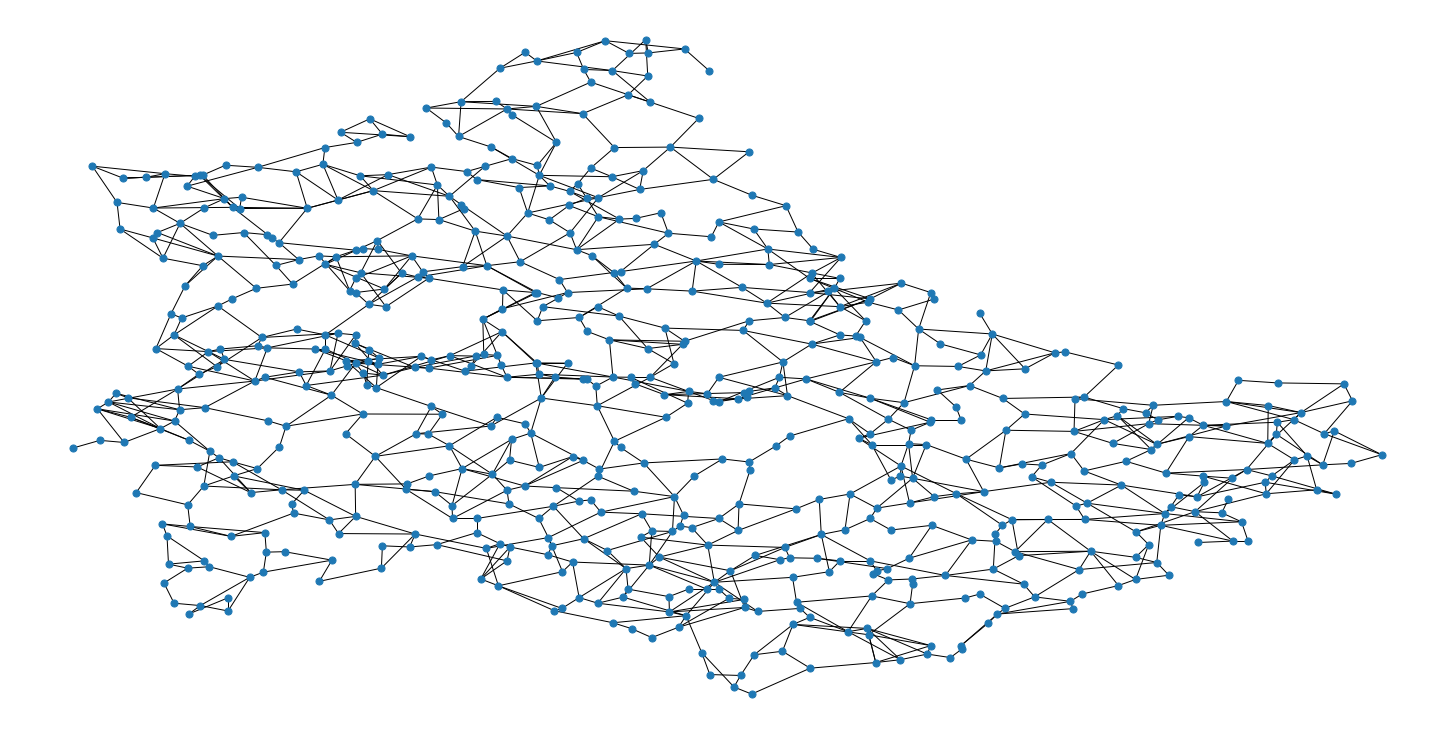

In [ ]:
#Graph 
G=nx.Graph()
G.add_weighted_edges_from(edges)
pos= dict([(df.id, (df.x, df.y)) for df in df_loc.itertuples()])
plt.figure(figsize=(20,10))
nx.draw(G,with_labels=False,pos=pos,node_size=50)


123 

4 



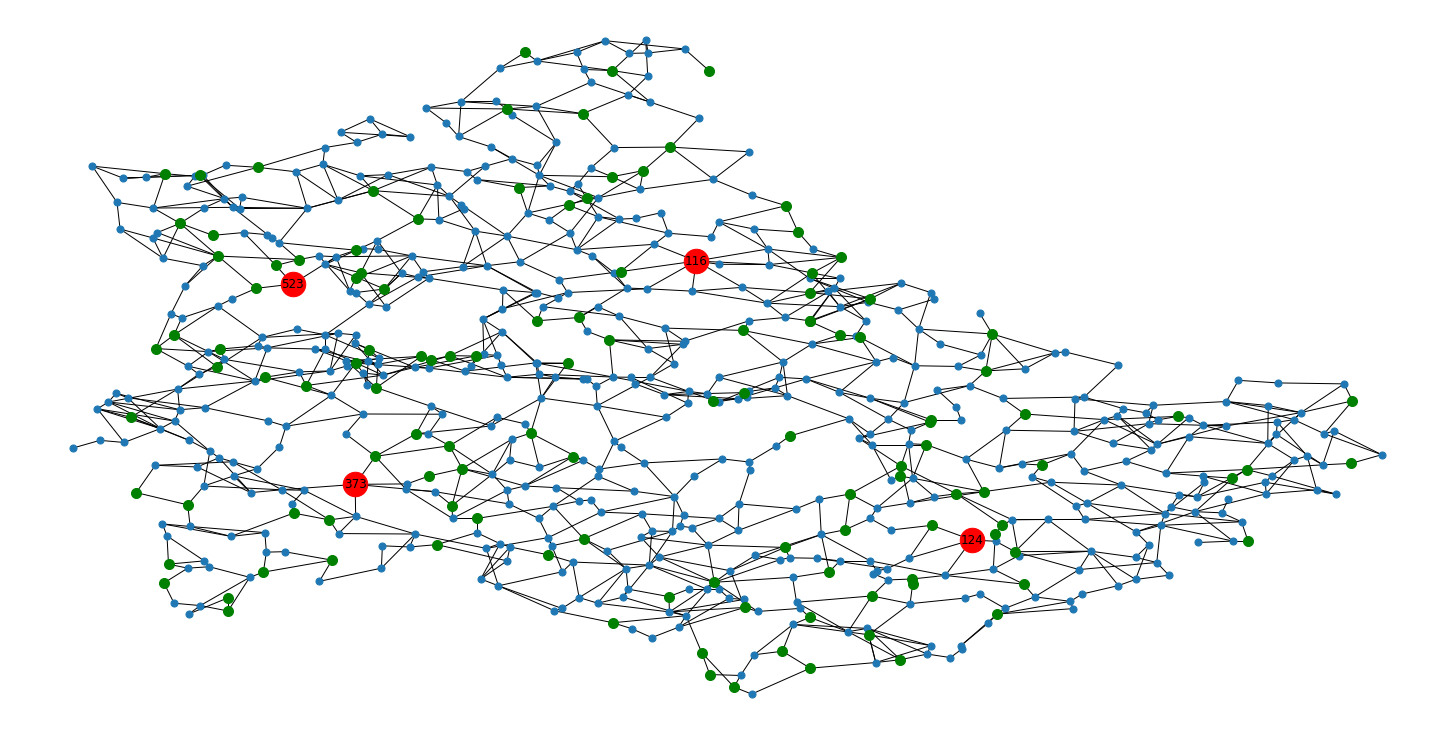

In [ ]:
#Drawing with depot labels and separate coloured nodes - green - customer nodes, red - depot, blue - non-customer nodes

cust_loc_ids = [df.id for df in df_loc.loc[df_loc.is_customer==True].itertuples()]
print(len(cust_loc_ids),'\n')
depot_loc_ids = [df.id for df in df_loc.loc[df_loc.is_depot==True].itertuples()]
print(len(depot_loc_ids),'\n')
show_network()  

#### Assigning routes and fetching nodes of 4 depots
Dijkstra's multi source shortest path algorithm is used to segregate distinct customer nodes for the 4 depots in order to prevent repetition of customers in different depot routes.

In [ ]:
#Multi source shortest path gives a dictionary of target nodes as keys with tuple of length and path from one of the depots as values

paths=nx.multi_source_dijkstra(G,depot_loc_ids)
cust_paths=dict()
for i in paths[0].keys():
  if i in cust_loc_ids:
    cust_paths[i]=(paths[1][i],paths[0][i])

print(cust_paths)

{70: ([523, 70], 20.615528128088304), 14: ([124, 208, 14], 22.330294086418878), 257: ([523, 257], 23.781994174584177), 542: ([124, 542], 27.89553484341211), 204: ([124, 208, 204], 29.586556519808234), 36: ([124, 208, 14, 36], 33.059858066844264), 270: ([373, 270], 34.87294973844438), 235: ([523, 257, 235], 38.081507461755685), 398: ([116, 398], 43.501309048006036), 180: ([373, 344, 180], 44.06255162657534), 520: ([373, 441, 520], 52.81228303943399), 183: ([523, 99, 183], 53.44800909940022), 633: ([124, 199, 633], 63.16267786215596), 431: ([373, 425, 431], 63.6410914849879), 200: ([373, 344, 180, 200], 64.06644461194828), 519: ([523, 70, 519], 64.13448518659455), 260: ([124, 199, 633, 260], 69.55761026992997), 13: ([373, 270, 13], 69.7636775739308), 225: ([523, 99, 261, 225], 72.60888721079233), 100: ([373, 441, 520, 100], 74.116223149185), 337: ([373, 270, 337], 77.57667778284198), 31: ([116, 484, 31], 77.8063113002674), 206: ([124, 208, 14, 36, 206], 78.0539331226795), 8: ([523, 99, 2

The nodes and customer nodes assigned to different depots are extracted from the discussed dictionary in order to draw networkx subgraphs of the depots and proceed with assignment of routes to lorries.

In [ ]:
# getting the nodes assigned to all depots

DD116=[]
DD523=[]
DD373=[]
DD124=[]
for i in cust_paths.values():
  if i[0][0]==116:
    DD116.extend(i[0])
  elif i[0][0]==523:
    DD523.extend(i[0])
  elif i[0][0]==373:
    DD373.extend(i[0])
  elif i[0][0]==124:
    DD124.extend(i[0])

nodes116= list(dict.fromkeys(DD116))
nodes124= list(dict.fromkeys(DD124))
nodes373= list(dict.fromkeys(DD373))
nodes523= list(dict.fromkeys(DD523))



In [ ]:
custnodes116=findCustomerNodes(116, nodes116)
custnodes124=findCustomerNodes(124, nodes124)
custnodes373=findCustomerNodes(373, nodes373)
custnodes523=findCustomerNodes(523, nodes523)
print(len(custnodes116))
print(len(custnodes124))
print(len(custnodes373))
print(len(custnodes523))
print(custnodes116)
print(custnodes124)
print(custnodes373)
print(custnodes523)

33
41
31
22
[116, 398, 31, 380, 243, 584, 528, 453, 437, 146, 265, 80, 271, 459, 624, 511, 621, 64, 550, 5, 113, 569, 73, 308, 393, 110, 32, 387, 598, 65, 534, 41, 77]
[124, 14, 542, 204, 36, 633, 260, 206, 411, 476, 254, 539, 397, 220, 171, 147, 507, 418, 449, 169, 264, 245, 446, 408, 160, 105, 63, 210, 118, 372, 177, 566, 202, 130, 214, 374, 400, 324, 175, 362, 606]
[373, 270, 180, 520, 431, 200, 13, 100, 337, 103, 78, 497, 377, 531, 474, 86, 547, 364, 172, 543, 205, 294, 455, 389, 44, 190, 274, 22, 144, 216, 135]
[523, 70, 257, 235, 183, 519, 225, 8, 27, 276, 378, 491, 255, 391, 136, 603, 585, 632, 29, 332, 82, 94]


Dijkstra's algorithm is again used to compute the all pairs shortest path between every pair of nodes in the Optilandia graph. The resulting distance matrix is used as the main input for the optimization algorithm in computing the best route.

In [ ]:
#Finding all pairs shortest paths for convenience

allpairs=dict(nx.all_pairs_dijkstra_path_length(G))
#dict of dicts - 0:{0:,1:,----633:}, 1:{0:, 1:, 2:} , say matrix
dist_graph=np.array([[allpairs[i][j] for i in range(len(G.nodes))] for j in range(len(G.nodes))])
dist_graph[116][373]

397.1380815592918

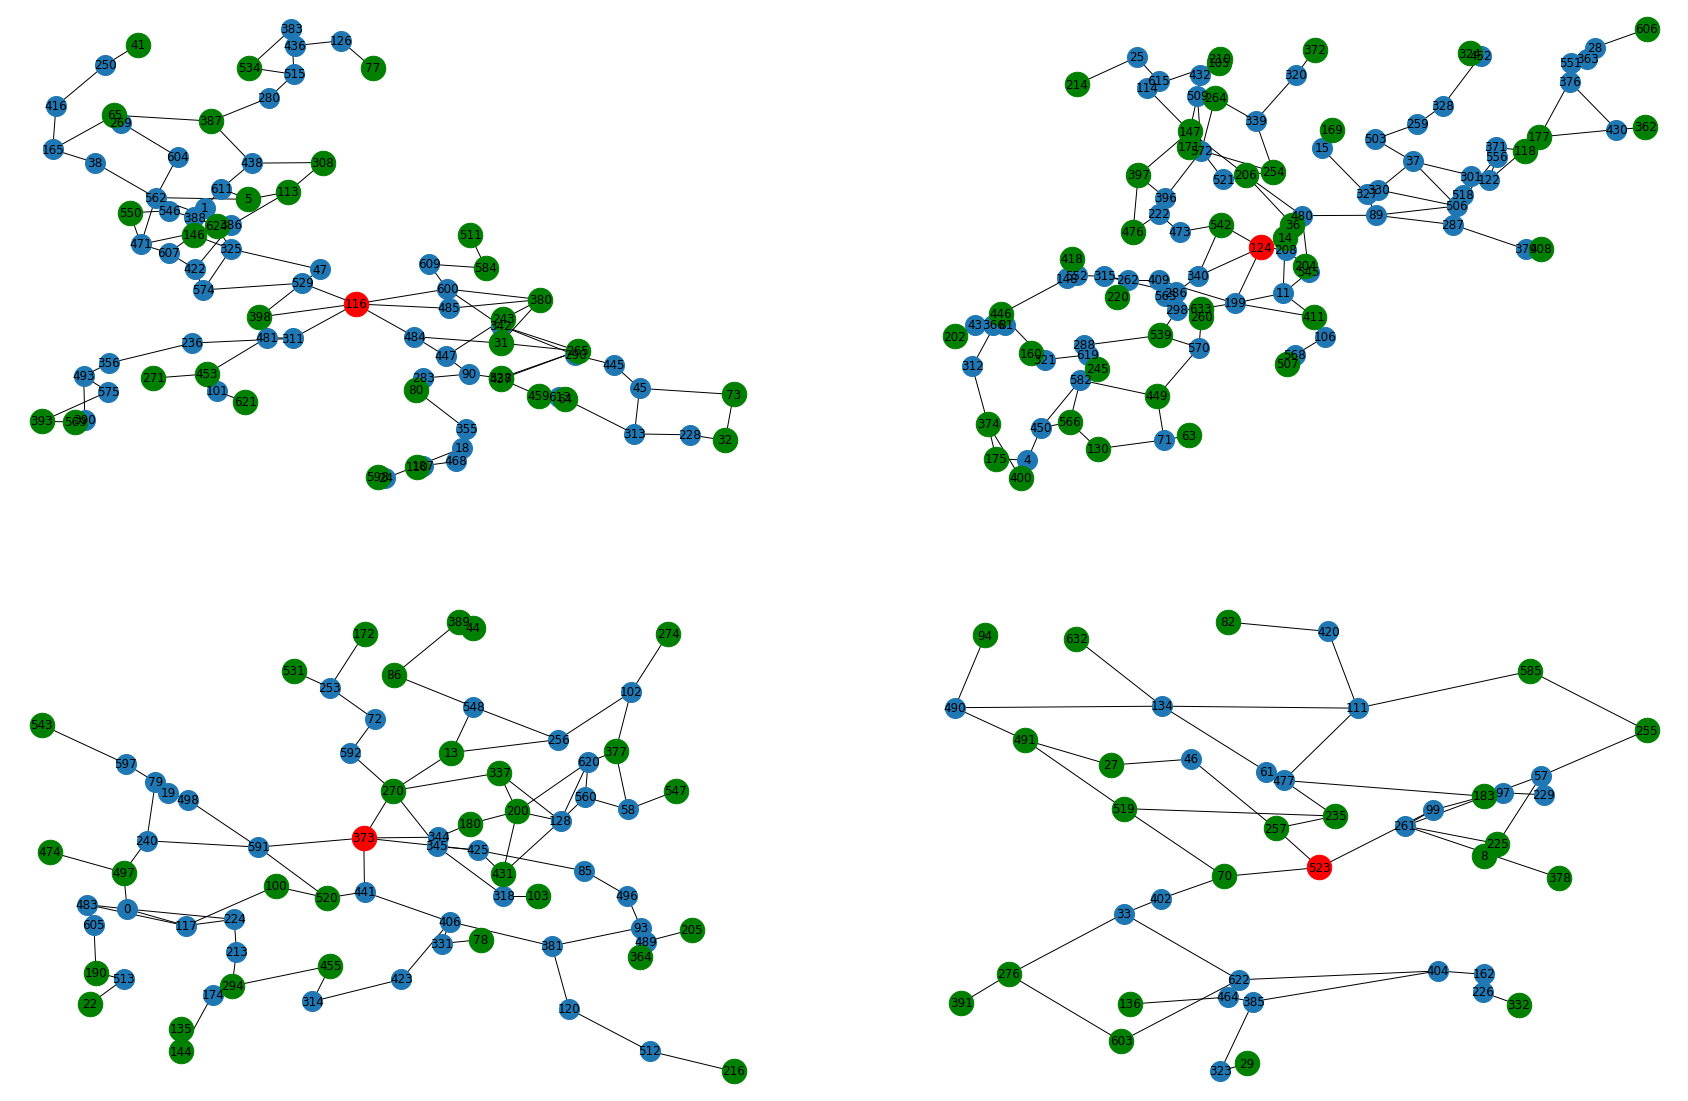

In [ ]:
G116=G.subgraph(nodes116)
G523=G.subgraph(nodes523)
G373=G.subgraph(nodes373)
G124=G.subgraph(nodes124)
fig,ax=plt.subplots(2,2, figsize=(30,20))

axis=ax.flatten()

nx.draw(G116,with_labels=False,pos=pos,node_size=400, ax=axis[0])
nx.draw_networkx_nodes(G116,pos,nodelist=[116],node_color='r',node_size=600,alpha=1,ax=axis[0]);
nx.draw_networkx_labels(G116,pos,{k:k for k in nodes116}, ax=axis[0]);
nx.draw_networkx_nodes(G116,pos,nodelist={k: k for k in cust_loc_ids if k not in [116] and k in nodes116},node_color='g',node_size=600,alpha=1, ax=axis[0]);

nx.draw(G124,with_labels=False,pos=pos,node_size=400, ax=axis[1])
nx.draw_networkx_nodes(G124,pos,nodelist=[124],node_color='r',node_size=600,alpha=1,ax=axis[1]);
nx.draw_networkx_labels(G124,pos,{k:k for k in nodes124}, ax=axis[1]);
nx.draw_networkx_nodes(G124,pos,nodelist={k: k for k in cust_loc_ids if k not in [124] and k in nodes124},node_color='g',node_size=600,alpha=1, ax=axis[1]);

nx.draw(G373,with_labels=False,pos=pos,node_size=400, ax=axis[2])
nx.draw_networkx_nodes(G373,pos,nodelist=[373],node_color='r',node_size=600,alpha=1,ax=axis[2]);
nx.draw_networkx_labels(G373,pos,{k:k for k in nodes373}, ax=axis[2]);
nx.draw_networkx_nodes(G373,pos,nodelist={k: k for k in cust_loc_ids if k not in [373] and k in nodes373},node_color='g',node_size=600,alpha=1, ax=axis[2]);

nx.draw(G523,with_labels=False,pos=pos,node_size=400, ax=axis[3])
nx.draw_networkx_nodes(G523,pos,nodelist=[523],node_color='r',node_size=600,alpha=1,ax=axis[3]);
nx.draw_networkx_labels(G523,pos,{k:k for k in nodes523}, ax=axis[3]);
nx.draw_networkx_nodes(G523,pos,nodelist={k: k for k in cust_loc_ids if k not in [523] and k in nodes523},node_color='g',node_size=600,alpha=1, ax=axis[3]);

plt.show()

### APPLICATION OF ANT COLONY OPTIMIZATION AND DELIVERY EXECUTION
On extracting the customer nodes pertaining to all 4 depots and computing the distance matrix of the nodes in graph, the ant colony optimization technique is implemented by instantiation of the ACO class followed by invocation of the fit() function. The constructor of ACO class is  provided with parameters say, number of ants , evaporation rates and intensity factors as furnished below. The fit() function is invoked with 100 iterations, customer nodes pertaining to the depot and its distance matrix as input which actually performs the optimization with the specified number of ants for the specified number of iterations thus computing the best route based on distance matrix and pheromone deposit. The graph of distance against number of iterations is plotted using plot() function for readability. 

In [ ]:
np.random.seed(11)

Beginning Ant Colony Optimization with 100 iterations:
Best distance/cost in iteration 0: 2948.19; bestpath: [0, 1, 6, 8, 13, 17, 22, 15, 5, 2, 3, 12, 7, 16, 18, 19, 20, 27, 29, 31, 32, 30, 23, 14, 9, 21, 24, 4, 10, 26, 28, 25, 11]; overall: 2948.19 (0s)
Best distance/cost in iteration 1: 2468.91; bestpath: [0, 15, 5, 3, 4, 22, 26, 17, 25, 28, 8, 6, 10, 2, 13, 11, 16, 21, 24, 12, 7, 1, 19, 20, 23, 27, 29, 30, 31, 9, 14, 18, 32]; overall: 2468.91 (0s)
Best distance/cost in iteration 2: 2222.6; bestpath: [0, 1, 5, 3, 4, 10, 6, 8, 13, 17, 2, 15, 22, 26, 28, 25, 11, 16, 7, 12, 21, 24, 9, 14, 18, 19, 20, 23, 27, 29, 30, 31, 32]; overall: 2222.6 (0s)
Best distance/cost in iteration 3: 2451.89; bestpath: [0, 1, 5, 2, 10, 22, 26, 13, 17, 8, 6, 25, 28, 11, 16, 7, 12, 21, 24, 14, 18, 19, 20, 23, 27, 29, 31, 32, 30, 9, 15, 4, 3]; overall: 2222.6 (0s)
Best distance/cost in iteration 4: 2280.72; bestpath: [0, 1, 7, 12, 16, 21, 24, 20, 9, 14, 18, 27, 29, 31, 32, 30, 23, 19, 15, 5, 3, 4, 10, 6, 8, 17

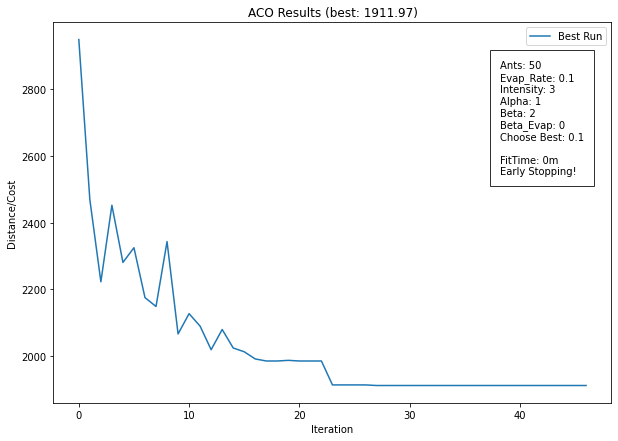

In [ ]:
# Depot 116

cities=custnodes116
cost_matrix=[[dist_graph[i][j] for j in cities] for i in cities]
cm=np.array(cost_matrix)
problem = cm
optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
                               beta_evap_rate=0, choosebest=.1)
best, path = optimizer.fit(problem, cities, 100)
optimizer.plot()

The best path provided by the ACO algorithm is given below. The best distance computed by ACO is 1911.97 miles as per the above graph which **does not agree** with the delivery scheduling routine's computation furnished as results below. This is because the delivery scheduling routine computes the results of the 1st trip with some more fuel requirement pending delivery. The remaining customers will be visited int he following sections.

In [ ]:
tour116=[]
for i in path:
  tour116.append(custnodes116[i])
print(tour116)

[116, 398, 146, 624, 550, 5, 113, 308, 387, 65, 41, 77, 534, 511, 584, 380, 243, 265, 31, 73, 32, 64, 459, 437, 528, 80, 110, 598, 621, 453, 271, 569, 393]


The delivery scheduling routine is implemented using the ordered customer list obtained as a result of ant colony optimization thus achieving the fuel delivery with the least possible cost. The delivery schedule returned by the function is the input to the output file generating function.Once delivery schedule is generated , the remaining fuel requirement is also computed to decide on a second trip for the intended depot. 

The below code invokes the delivery scheduling routine for depot 116 which returns the path travelled by the tankers, total capacity of lorries int he depot, total fuel requirement of customers around the depot, delivery schedule with distance and cost of delivery, remaining amount of fuel required , the customers who require more fuel and the destination of the lorries at the end of the trip. The subgraph is marked with the travelled route for clarity.

In [ ]:
path116Final, visited116, cl116prev, totalLorryCapacity116, totalFuelRequirement116, cl116, lorry116, dest, distSum116, costSum116, remainingFuelRequired, fuelRequired= ExecuteDelivery(116, G, tour116)
print('Customer order from depot 116=', visited116, '\n','Route from depot 116= ', path116Final,'\n', 'totalLorryCapacity116=',totalLorryCapacity116,'\n', 'totalFuelRequirement116=',totalFuelRequirement116,'\n', 'Updated customer details=',cl116,'\n', 'Delivery Schedule=',lorry116,'\n', 'End point of lorries=',dest,'\n', 'Distance covered=',distSum116,'\n', 'Cost of delivery=',costSum116,'\n', 'remainingFuelRequired=',remainingFuelRequired,'\n', 'fuelRequired=',fuelRequired)


Customer order from depot 116= [116, 398, 146, 624, 550, 5, 113, 308, 387, 65, 41, 77, 534, 511, 584, 380, 243, 265, 31, 73, 32, 64, 459, 437, 528, 80, 110, 598, 621, 453, 271, 569, 393] 
 Route from depot 116=  [116, 398, 583, 150, 574, 422, 607, 146, 624, 388, 546, 550, 546, 562, 5, 113, 308, 438, 387, 65, 231, 416, 250, 41, 6, 563, 126, 77, 126, 436, 383, 534, 178, 499, 308, 602, 410, 511, 584, 153, 380, 243, 342, 265, 31, 265, 290, 445, 45, 73, 32, 228, 313, 64, 613, 459, 437, 528, 90, 283, 80, 355, 18, 468, 187, 110, 419, 530, 24, 598, 525, 307, 595, 621, 101, 453, 271, 559, 356, 493, 390, 569, 393] 
 totalLorryCapacity116= 17 
 totalFuelRequirement116= 23.86 
 Updated customer details= {0: [116, 116, 398, 43.501309048006036, 0.89, '116-1', 0.89], 1: [116, 398, 146, 98.12287728193633, 1.45, '116-1', 1.45], 2: [116, 146, 624, 13.379556913814396, 0.51, '116-1', 0.51], 3: [116, 624, 550, 42.08309151715558, 0.45999999999999996, '116-1', 0.45999999999999996], 4: [116, 550, 5, 70.884412

In [ ]:
for node in path116Final:
  if node not in nodes116:
    nodes116.append(node)

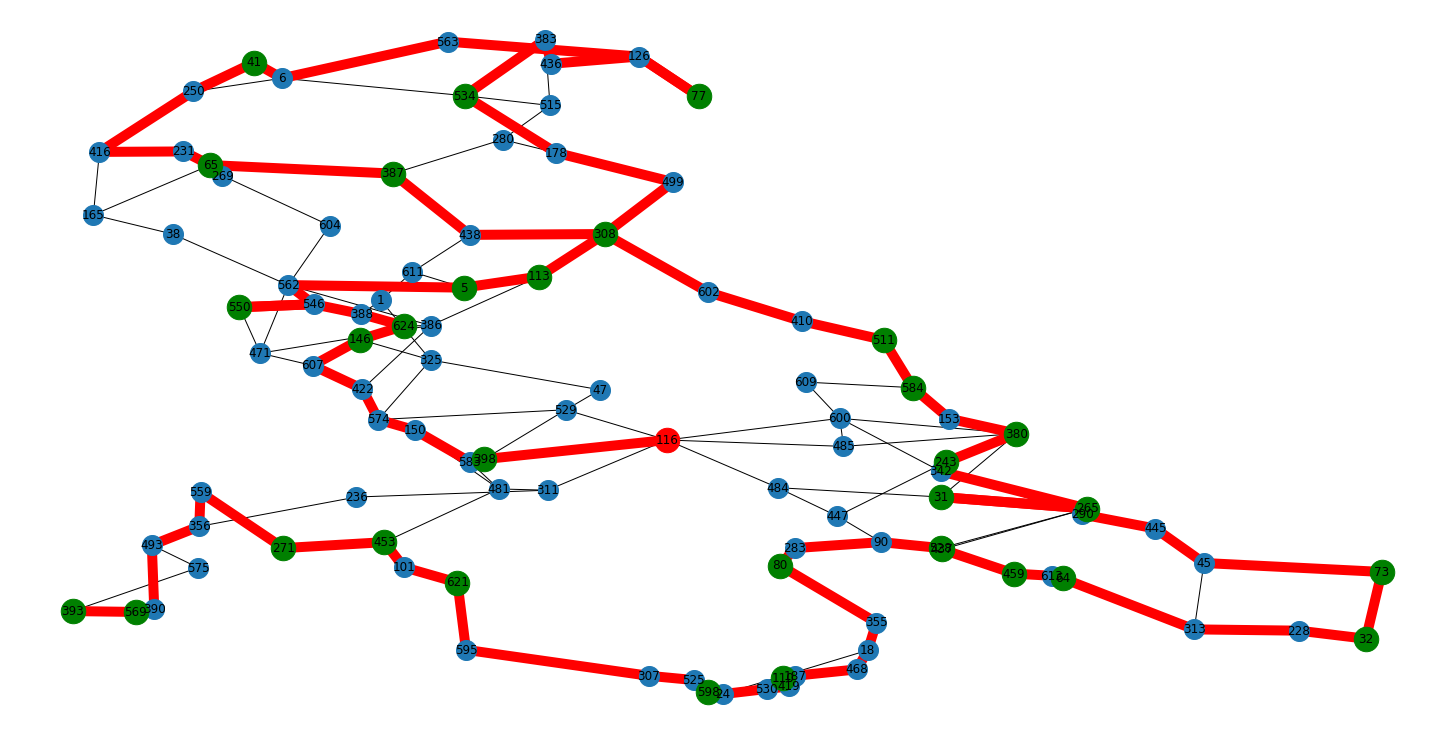

In [ ]:
G116=drawGraph(G, 116, nodes116, path116Final)

Depot 116 is still not completed since there is more requirement of fuel ( 6.85 gallons as computed above). Hence the required number of lorries ( 1 here) are brought back from thier current location (destination computed above) to the depot to fill the required fuel for delivery. The remaining customers and their distance matrix are again ordered using Ant Colony Optimization and the delivery is planned as discussed.

In [ ]:
# If fuel is required, 2nd round filling is done for required lorries

if len(fuelRequired)>0:
  backtodepot116=dict()
  sumCapacity, backtodepot116= fillRequiredLorries(116, remainingFuelRequired)
  lorry116.update(backtodepot116)
  distSum116, costSum116= findTotalDistanceCost(lorry116)
  nodesRem116= [116]
  custNodes116=fuelRequired.keys()
  nodesRem116.extend(custNodes116)
  print(nodesRem116)
 

[116, 437, 528, 80, 110, 598, 621, 453, 271, 569, 393]


In [ ]:
 print(backtodepot116)

{(31, '116-1-to-depot'): ['116-1', 12, 0, 0, 77.8063113002674, 116.7094669504011]}


Beginning Ant Colony Optimization with 100 iterations:
Best distance/cost in iteration 0: 613.37; bestpath: [0, 2, 1, 3, 4, 5, 6, 8, 7, 9, 10]; overall: 613.37 (0s)
Best distance/cost in iteration 1: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 2: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 3: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 4: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 5: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 6: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 7: 566.61; bestpath: [0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10]; overall: 566.61 (0s)
Best distance/cost in iteration 8: 566.61; bestpath: [0, 2, 1, 3,

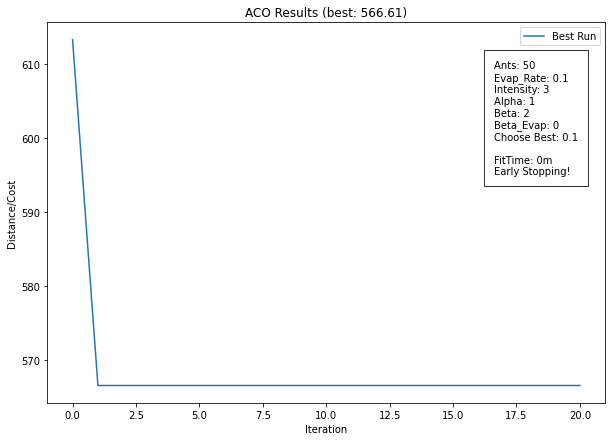

In [ ]:
#Remaining fuel from depot 116

cities=nodesRem116
cost_matrix=[[dist_graph[i][j] for j in cities] for i in cities]
cm=np.array(cost_matrix)
problem = cm
optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
                               beta_evap_rate=0, choosebest=.1)
best, path = optimizer.fit(problem, cities, 100)
optimizer.plot()

The best path provided by the ACO algorithm is given below. The best distance computed by ACO is 566.60 miles as per the above graph which agrees with the delivery scheduling routine's computation furnished as results below.

In [ ]:
tourRem116=[]
for i in path:
  tourRem116.append(nodesRem116[i])
print(tourRem116)

[116, 528, 437, 80, 110, 598, 621, 453, 271, 569, 393]


In [ ]:

pathRem116, visitedRem116, clRem116prev, totalLorryCapacityRem116, totalFuelRequirementRem116, clRem116, lorryRem116, destRem, distRemSum116, costRemSum116, remainingFuelRequired, fuelRequired= ExecuteDelivery(116, G, tourRem116, sumCapacity)
print('Customer order from depot 116=', visitedRem116, '\n','Route from depot 116=', pathRem116,'\n', 'totalLorryCapacity116=',totalLorryCapacityRem116,'\n', 'totalFuelRequirement116=',totalFuelRequirementRem116,'\n', 'Updated customer details=',clRem116,'\n', 'Delivery Schedule=',lorryRem116,'\n', 'End point of lorries=',destRem,'\n', 'Distance covered=',distRemSum116,'\n', 'Cost of delivery=',costRemSum116,'\n', 'remainingFuelRequired=',remainingFuelRequired,'\n', 'fuelRequired=',fuelRequired)

Customer order from depot 116= [116, 528, 437, 80, 110, 598, 621, 453, 271, 569, 393] 
 Route from depot 116= [116, 484, 447, 90, 528, 437, 528, 90, 283, 80, 355, 18, 468, 187, 110, 419, 530, 24, 598, 525, 307, 595, 621, 101, 453, 271, 559, 356, 493, 390, 569, 393] 
 totalLorryCapacity116= 12 
 totalFuelRequirement116= 6.860000000000002 
 Updated customer details= {0: [116, 116, 528, 96.97399112276625, 0.12, '116-1', 0.12], 1: [116, 528, 437, 0.8783542451651771, 0.5500000000000012, '116-1', 0.5500000000000012], 2: [116, 437, 80, 47.002845138371924, 0.22999999999999998, '116-1', 0.22999999999999998], 3: [116, 80, 110, 91.98913526130298, 1.99, '116-1', 1.99], 4: [116, 110, 598, 25.051455145266445, 0.97, '116-1', 0.97], 5: [116, 598, 621, 108.27671685814468, 0.24, '116-1', 0.24], 6: [116, 621, 453, 32.77269930900902, 0.61, '116-1', 0.61], 7: [116, 453, 271, 23.38118096802995, 0.9, '116-1', 0.9], 8: [116, 271, 569, 125.82385537210463, 0.13, '116-1', 0.13], 9: [116, 569, 393, 14.45517763640

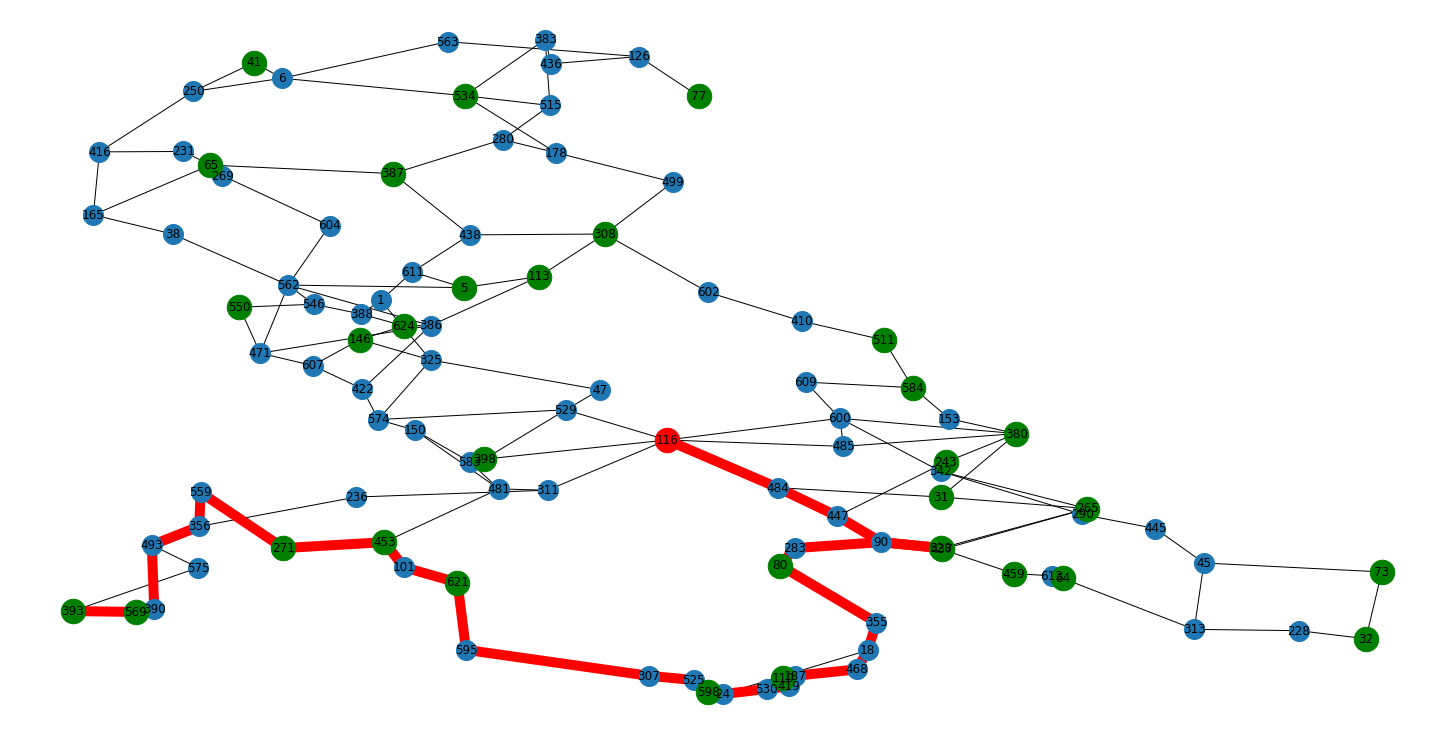

In [ ]:
G116_rem=drawGraph(G, 116, nodes116, pathRem116)

Similarly the delivery is scheduled with distance and cost calculation for depots 523, 373 and 124 which require a single trip to complete the delivery due to availability of greater numer of lorries thatn that of depot 116. The subgraphs of the depots are also marked with the travelled route.

Beginning Ant Colony Optimization with 100 iterations:
Best distance/cost in iteration 0: 1083.47; bestpath: [0, 7, 6, 4, 3, 2, 1, 5, 11, 8, 21, 17, 20, 16, 12, 10, 14, 15, 9, 13, 18, 19]; overall: 1083.47 (0s)
Best distance/cost in iteration 1: 1054.75; bestpath: [0, 1, 5, 11, 8, 21, 17, 20, 16, 12, 10, 7, 6, 4, 3, 2, 9, 13, 18, 19, 15, 14]; overall: 1054.75 (0s)
Best distance/cost in iteration 2: 975.08; bestpath: [0, 1, 5, 11, 8, 21, 17, 20, 16, 12, 10, 7, 6, 4, 3, 2, 9, 13, 14, 15, 18, 19]; overall: 975.08 (0s)
Best distance/cost in iteration 3: 975.08; bestpath: [0, 1, 5, 11, 8, 21, 17, 20, 16, 12, 10, 7, 6, 4, 3, 2, 9, 13, 14, 15, 18, 19]; overall: 975.08 (0s)
Best distance/cost in iteration 4: 975.08; bestpath: [0, 1, 5, 11, 8, 21, 17, 20, 16, 12, 10, 7, 6, 4, 3, 2, 9, 13, 14, 15, 18, 19]; overall: 975.08 (0s)
Best distance/cost in iteration 5: 975.08; bestpath: [0, 1, 5, 11, 8, 21, 17, 20, 16, 12, 10, 7, 6, 4, 3, 2, 9, 13, 14, 15, 18, 19]; overall: 975.08 (0s)
Best distance/cos

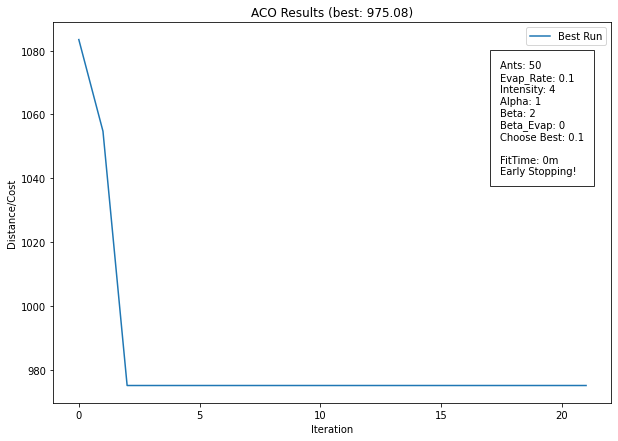

In [ ]:
#Depot 523

cities=custnodes523
cost_matrix=[[dist_graph[i][j] for j in cities] for i in cities]
cm=np.array(cost_matrix)
problem = cm
optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=4, alpha=1, beta=2,
                               beta_evap_rate=0, choosebest=.1)
best, path = optimizer.fit(problem, cities, 100)
optimizer.plot()


The best path provided by the ACO algorithm is given below. The best distance computed by ACO is 975.08 miles as per the above graph which agrees with the delivery scheduling routine's computation furnished as results below.

In [ ]:
tour523=[]
for i in path:
  tour523.append(custnodes523[i])
print(tour523)

[523, 70, 519, 491, 27, 94, 632, 82, 585, 255, 378, 8, 225, 183, 235, 257, 276, 391, 136, 603, 29, 332]


In [ ]:
path523Final, visited523, cl523prev, totalLorryCapacity523, totalFuelRequirement523, cl523, lorry523, dest, distSum523, costSum523, remainingFuelRequired, fuelRequired= ExecuteDelivery(523, G, tour523)
print('Customer order from depot 523=', visited523, '\n','Route from depot 523= ', path523Final,'\n', 'totalLorryCapacity523=',totalLorryCapacity523,'\n', 'totalFuelRequirement523=',totalFuelRequirement523,'\n', 'Updated customer details=',cl523,'\n', 'Delivery schedule=',lorry523,'\n', 'End point of lorries=',dest,'\n', 'Distance covered=',distSum523,'\n', 'Cost of delivery=',costSum523,'\n', 'remainingFuelRequired=',remainingFuelRequired,'\n', 'fuelRequired=',fuelRequired)


Customer order from depot 523= [523, 70, 519, 491, 27, 94, 632, 82, 585, 255, 378, 8, 225, 183, 235, 257, 276, 391, 136, 603, 29, 332] 
 Route from depot 523=  [523, 70, 519, 491, 27, 491, 490, 94, 612, 632, 329, 151, 82, 420, 302, 585, 255, 57, 88, 378, 463, 119, 8, 225, 261, 99, 183, 99, 184, 235, 257, 523, 70, 402, 33, 276, 391, 317, 136, 579, 603, 291, 176, 323, 29, 440, 375, 285, 172, 12, 508, 332] 
 totalLorryCapacity523= 56 
 totalFuelRequirement523= 14.769999999999996 
 Updated customer details= {0: [523, 523, 70, 20.615528128088304, 1.46, '523-4', 1.46], 1: [523, 70, 519, 43.51895705850624, 0.21000000000000002, '523-4', 0.21000000000000002], 2: [523, 519, 491, 43.87303764386437, 0.33999999999999997, '523-4', 0.33999999999999997], 3: [523, 491, 27, 22.94988555352732, 1.02, '523-4', 1.02], 4: [523, 27, 94, 87.30248798830219, 1.52, '523-4', 1.52], 5: [523, 94, 632, 19.662978278925767, 1.24, '523-4', 1.24], 6: [523, 632, 82, 36.74093823012999, 0.6, '523-4', 0.6], 7: [523, 82, 585,

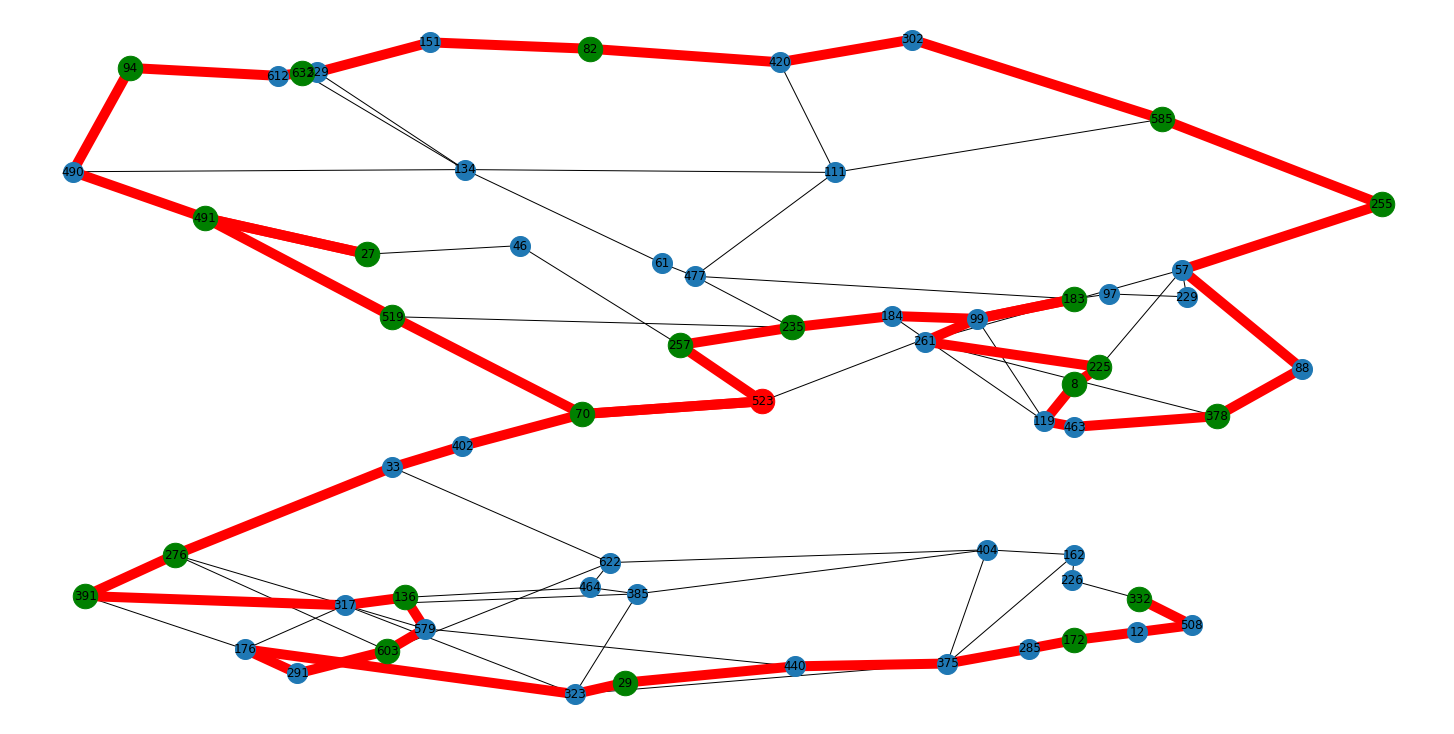

In [ ]:
for node in path523Final:
  if node not in nodes523:
    nodes523.append(node)

G523=drawGraph(G, 523, nodes523, path523Final)

Beginning Ant Colony Optimization with 100 iterations:
Best distance/cost in iteration 0: 2715.51; bestpath: [0, 1, 6, 8, 12, 16, 26, 23, 24, 15, 18, 13, 5, 2, 30, 28, 27, 25, 10, 22, 21, 17, 20, 9, 4, 3, 7, 14, 11, 19, 29]; overall: 2715.51 (0s)
Best distance/cost in iteration 1: 2467.72; bestpath: [0, 1, 6, 8, 5, 2, 4, 9, 10, 22, 21, 28, 30, 27, 25, 11, 7, 3, 20, 17, 29, 14, 13, 23, 24, 15, 18, 12, 16, 26, 19]; overall: 2467.72 (0s)
Best distance/cost in iteration 2: 2326.68; bestpath: [0, 1, 6, 8, 12, 16, 17, 20, 10, 22, 21, 30, 28, 27, 25, 3, 7, 2, 5, 4, 9, 14, 11, 19, 13, 15, 18, 24, 23, 26, 29]; overall: 2326.68 (0s)
Best distance/cost in iteration 3: 2186.63; bestpath: [0, 1, 6, 8, 5, 2, 4, 9, 10, 22, 21, 28, 30, 27, 25, 11, 7, 3, 13, 15, 18, 24, 23, 26, 12, 16, 17, 20, 29, 14, 19]; overall: 2186.63 (0s)
Best distance/cost in iteration 4: 2203.68; bestpath: [0, 1, 6, 8, 5, 2, 4, 9, 10, 22, 21, 28, 30, 27, 25, 11, 7, 3, 20, 17, 12, 16, 26, 23, 24, 15, 18, 13, 19, 14, 29]; overall

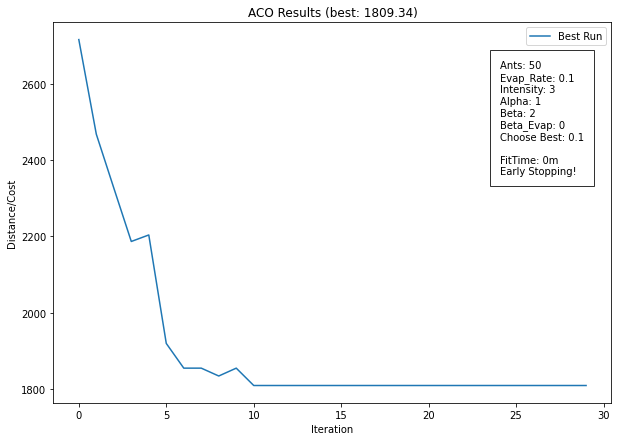

In [ ]:
#Depot 373

cities=custnodes373
cost_matrix=[[dist_graph[i][j] for j in cities] for i in cities]
cm=np.array(cost_matrix)
problem = cm
optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
                               beta_evap_rate=0, choosebest=.1)
best, path = optimizer.fit(problem, cities, 100)
optimizer.plot()

The best path provided by the ACO algorithm is given below. The best distance computed by ACO is 1809.33 miles as per the above graph which agrees with the delivery scheduling routine's computation furnished as results below.

In [ ]:
tour373=[]
for i in path:
  tour373.append(custnodes373[i])
print(tour373)

[373, 270, 13, 337, 200, 180, 431, 103, 78, 455, 294, 144, 135, 22, 190, 497, 474, 100, 520, 543, 531, 86, 172, 44, 389, 274, 377, 547, 205, 364, 216]


In [ ]:

path373Final, visited373, cl373prev, totalLorryCapacity373, totalFuelRequirement373, cl373, lorry373, dest, distSum373, costSum373, remainingFuelRequired, fuelRequired= ExecuteDelivery(373, G, tour373)
print('Customer order from depot 373=', visited373, '\n','Route from depot 373= ', path373Final,'\n', 'totalLorryCapacity373=',totalLorryCapacity373,'\n', 'totalFuelRequirement373=',totalFuelRequirement373,'\n', 'Updated customer details=',cl373,'\n', 'Delivery schedule=',lorry373,'\n', 'FInal destination of lorries=',dest,'\n', 'Distance covered=',distSum373,'\n', 'Cost of delivery=',costSum373,'\n', 'remainingFuelRequired=',remainingFuelRequired,'\n', 'fuelRequired=',fuelRequired)


Customer order from depot 373= [373, 270, 13, 337, 200, 180, 431, 103, 78, 455, 294, 144, 135, 22, 190, 497, 474, 100, 520, 543, 531, 86, 172, 44, 389, 274, 377, 547, 205, 364, 216] 
 Route from depot 373=  [373, 270, 13, 554, 337, 200, 180, 344, 345, 425, 431, 318, 103, 399, 78, 331, 348, 423, 314, 455, 294, 174, 144, 135, 144, 141, 282, 22, 513, 190, 605, 483, 0, 497, 474, 497, 0, 117, 100, 520, 591, 498, 19, 79, 597, 543, 588, 323, 29, 440, 531, 234, 295, 132, 86, 132, 295, 172, 12, 495, 389, 44, 389, 75, 293, 274, 102, 377, 326, 547, 326, 536, 439, 533, 205, 489, 364, 358, 299, 188, 512, 216] 
 totalLorryCapacity373= 129 
 totalFuelRequirement373= 18.65 
 Updated customer details= {0: [373, 373, 270, 34.87294973844438, 0.21999999999999997, '373-7', 0.21999999999999997], 1: [373, 270, 13, 34.89072783548643, 0.19999999999999996, '373-7', 0.19999999999999996], 2: [373, 13, 337, 24.81114851587331, 0.44999999999999996, '373-7', 0.44999999999999996], 3: [373, 337, 200, 27.82493075660903,

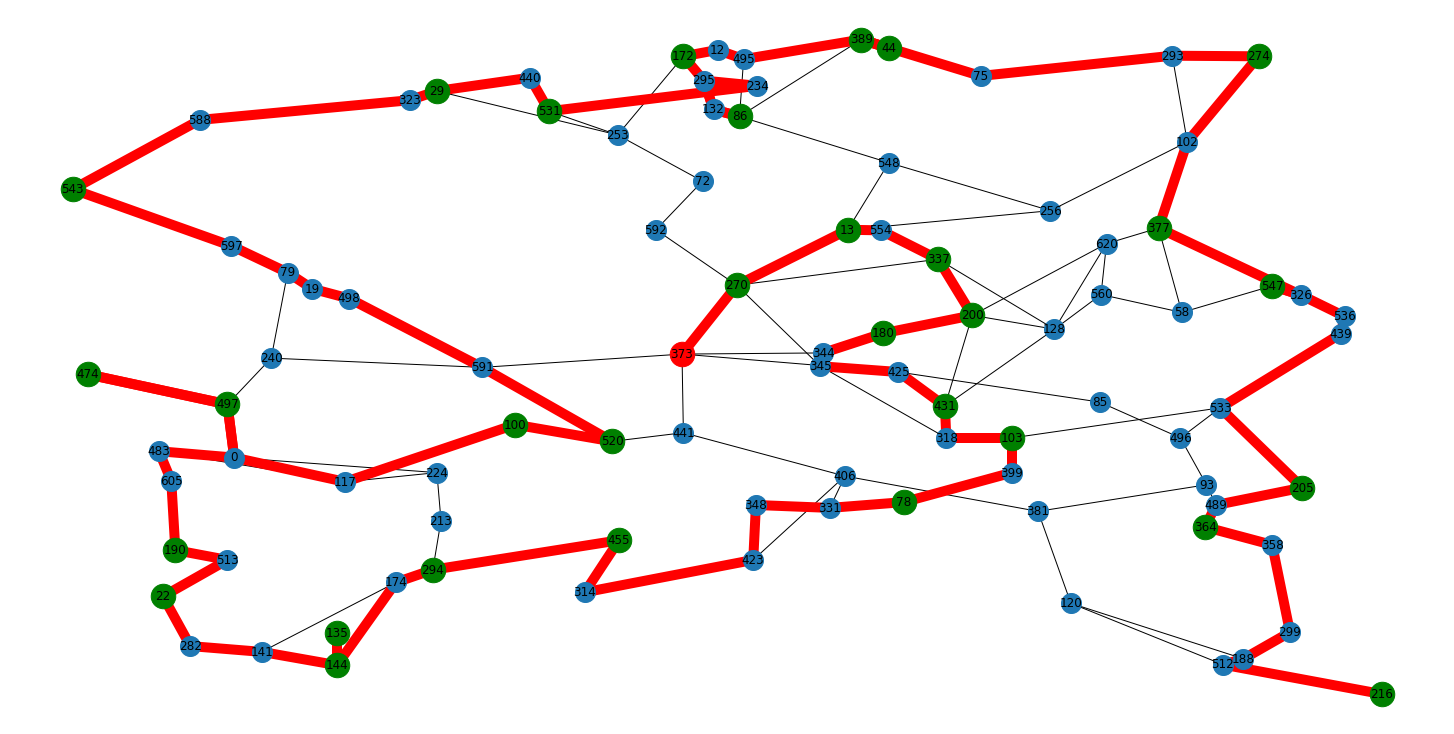

In [ ]:
for node in path373Final:
  if node not in nodes373:
    nodes373.append(node)

G373=drawGraph(G, 373, nodes373, path373Final)

Beginning Ant Colony Optimization with 100 iterations:
Best distance/cost in iteration 0: 3275.27; bestpath: [0, 1, 3, 2, 27, 25, 17, 9, 12, 15, 14, 4, 7, 10, 29, 19, 39, 28, 30, 23, 8, 13, 22, 21, 16, 5, 6, 11, 18, 26, 33, 31, 38, 35, 36, 32, 24, 34, 20, 40, 37]; overall: 3275.27 (0s)
Best distance/cost in iteration 1: 3225.77; bestpath: [0, 1, 4, 3, 2, 14, 15, 10, 7, 12, 5, 6, 11, 8, 16, 23, 30, 28, 29, 39, 37, 40, 19, 9, 17, 36, 38, 24, 22, 32, 35, 31, 33, 26, 18, 21, 13, 25, 27, 20, 34]; overall: 3225.77 (0s)
Best distance/cost in iteration 2: 2925.58; bestpath: [0, 2, 6, 5, 4, 1, 3, 7, 10, 29, 37, 19, 40, 39, 28, 30, 12, 15, 14, 25, 27, 20, 34, 17, 9, 22, 32, 24, 11, 18, 26, 33, 31, 38, 35, 36, 21, 13, 8, 16, 23]; overall: 2925.58 (0s)
Best distance/cost in iteration 3: 3028.85; bestpath: [0, 1, 4, 3, 2, 12, 9, 17, 36, 32, 24, 22, 35, 38, 31, 33, 26, 18, 21, 11, 5, 6, 16, 8, 13, 15, 14, 7, 10, 27, 20, 25, 34, 39, 37, 29, 19, 40, 28, 30, 23]; overall: 2925.58 (0s)
Best distance/cos

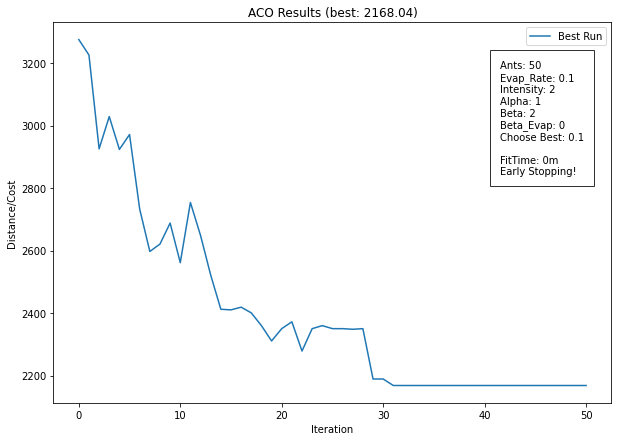

In [ ]:
#Depot 124

cities=custnodes124
cost_matrix=[[dist_graph[i][j] for j in cities] for i in cities]
cm=np.array(cost_matrix)
problem = cm
optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
                               beta_evap_rate=0, choosebest=.1)
best, path = optimizer.fit(problem, cities, 100)
optimizer.plot()

The best path provided by the ACO algorithm is given below. The best distance computed by ACO is 2168.04 miles as per the above graph which **does not agree** with the delivery scheduling routine's computation furnished as results below. This is because more than one lorry starts from depot and the distance from depot is additionally taken into account by the delivery scheduling routine.

In [ ]:
tour124=[]
for i in path:
  tour124.append(custnodes124[i])
print(tour124)

[124, 14, 36, 206, 254, 171, 147, 397, 476, 418, 220, 245, 160, 446, 202, 374, 175, 400, 566, 130, 63, 449, 539, 633, 260, 507, 411, 204, 542, 408, 118, 177, 362, 606, 324, 372, 169, 264, 105, 210, 214]


In [ ]:
path124Final, visited124, cl124prev, totalLorryCapacity124, totalFuelRequirement124, cl124, lorry124, dest, distSum124, costSum124, remainingFuelRequired, fuelRequired= ExecuteDelivery(124, G, tour124)
print('Customer order from depot 124=', visited124, '\n', 'Route from depot 124= ', path124Final,'\n', 'totalLorryCapacity124=',totalLorryCapacity124,'\n', 'totalFuelRequirement124=',totalFuelRequirement124,'\n', 'Updated customer details=',cl124,'\n', 'Delivery schedule=',lorry124,'\n', 'Final destination of lorries=',dest,'\n', 'Distance covered=',distSum124,'\n', 'Cost of delivery=',costSum124,'\n', 'remainingFuelRequired=',remainingFuelRequired,'\n', 'fuelRequired=',fuelRequired)

#The distance difference is because of subsequent lorries starting from depot and continuing the trip which is not counted in ACO

Customer order from depot 124= [124, 14, 36, 206, 254, 171, 147, 397, 476, 418, 220, 245, 160, 446, 202, 374, 175, 400, 566, 130, 63, 449, 539, 633, 260, 507, 411, 204, 542, 408, 118, 177, 362, 606, 324, 372, 169, 264, 105, 210, 214] 
 Route from depot 124=  [124, 208, 14, 36, 206, 254, 572, 171, 147, 397, 476, 384, 418, 552, 315, 262, 220, 392, 288, 619, 245, 619, 321, 160, 92, 281, 81, 446, 81, 366, 43, 202, 272, 312, 374, 175, 4, 400, 4, 450, 566, 130, 71, 63, 71, 449, 614, 561, 539, 298, 633, 260, 570, 594, 62, 568, 507, 568, 106, 411, 11, 545, 204, 208, 124, 542, 124, 208, 14, 36, 480, 89, 287, 379, 408, 379, 74, 118, 177, 430, 362, 104, 461, 606, 28, 359, 415, 452, 324, 227, 372, 320, 626, 303, 169, 303, 626, 339, 264, 509, 432, 105, 210, 105, 114, 615, 25, 214] 
 totalLorryCapacity124= 95 
 totalFuelRequirement124= 33.14 
 Updated customer details= {0: [124, 124, 14, 22.330294086418878, 0.32999999999999996, '124-6', 0.32999999999999996], 1: [124, 14, 36, 10.729563980425384, 0.81

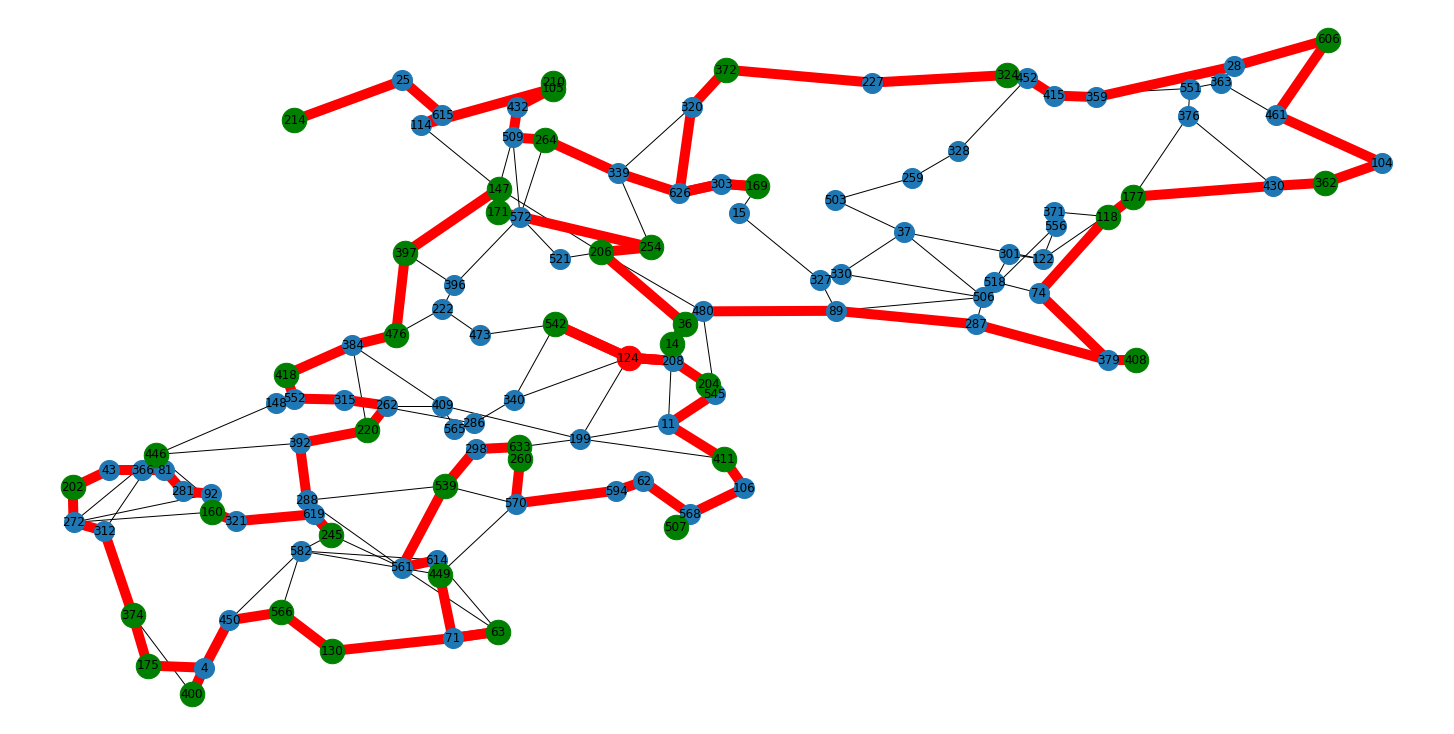

In [ ]:
for node in path124Final:
  if node not in nodes124:
    nodes124.append(node)

G124=drawGraph(G, 124, nodes124, path124Final)

#### Total Distance covered and cost of LPG delivery in Optilandia

The total distance covered by lorries of all depots and their cost of delivery are furnished below to find the total distance covered and cost incurred. The commented lines explain the different input parameters of Ant Colony algorithm and the resulting distance and cost for comparison. 

In [ ]:
#Total Distance and cost of delivery in Optilandia

print(costSum116+costRemSum116, costSum373, costSum523, costSum124)
print(distSum116+distRemSum116, distSum373, distSum523, distSum124)
totalCost=costSum116+costSum373+costSum523+costSum124+costRemSum116
totalDist=distSum116+ distSum373+distSum523+distSum124+distRemSum116
print(totalDist, totalCost)

#TRIALS:

#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1)
# 14803.446408958978 12691.858709929096 5443.33980912275 22758.213915996457
# 2413.9984043313166 2082.8846364473084 971.7368134845751 2597.8697077088846
# 8066.489561972085 55696.85884400728

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116
# 15086.697339746197 12598.868709929102 5614.61980912275 21478.935633606194
# 2399.987805852568 2012.7063399061612 1025.5169175320718 2460.0529161811037
# 7898.263979471904 54779.12149240424

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116 and 523
# 15086.697339746197 12598.868709929102 5843.04980912275 21478.935633606194
# 2399.987805852568 2012.7063399061612 1054.4081526596492 2460.0529161811037
# 7927.155214599482 55007.55149240425

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116 and 523 and 373
# 15086.697339746197 12916.692466912635 5843.04980912275 20114.572756632533
# 2399.987805852568 2077.4107206781805 1054.4081526596492 2620.3880694040163
# 8152.194748594414 53961.012372414116

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116 and 523 and 373 and 124
# 15086.697339746197 12916.692466912635 5843.04980912275 23144.24417727637
# 2399.987805852568 2077.4107206781805 1054.4081526596492 2777.6139422821884
# 8309.420621472585 56990.68379305795

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116 and 523 and 373 and
#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 124
# 15086.697339746197 12916.692466912635 5843.04980912275 19980.146047435457
# 2399.987805852568 2077.4107206781805 1054.4081526596492 2454.560704779434
# 7986.367383969831 53826.58566321705

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116 and 523
#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 373
#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 124
# 15086.697339746197 11691.560520536574 5843.04980912275 20083.69604743545
# 2399.987805852568 1842.7264808307523 1054.4081526596492 2467.9123289945237
# 7765.034768337493 52705.003716840976


# AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                                beta_evap_rate=0, choosebest=.1) 116

# AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1) 523
# AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1) 373
# AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1) 124

# 15086.697339746197 11691.560520536574 5828.072925299346 20083.69604743545
# 2399.987805852568 1842.7264808307523 987.0696554780416 2467.9123289945237
# 7697.696271155885 52690.02683301756


# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)
# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)
# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)
# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)

# 14360.543791305354 13292.300520536577 5553.212925299345 18788.7957760878
# 2236.0410831078925 1854.6744174343796 933.8471657890831 2178.453922711588
# 7203.0165890429425 51994.853013229076


# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)
# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=4, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)
# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)
# optimizer = AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                                beta_evap_rate=0, choosebest=.1)

# 14360.543791305354 12278.210520536577 5696.812925299345 19049.60202234577
# 2236.0410831078925 1805.2129810215433 964.95233012335 2288.4944013223085
# 7294.700795575095 51385.16925948704

#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=4,
#                               beta_evap_rate=0, choosebest=.1) for 116
#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 523
#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 373
#AntColonyOptimizer(ants=33, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 124

# 15873.14215775875 12712.938709929096 5763.892925299347 19644.674168266596
# 2484.418366039776 1912.076058934253 1016.6863963674666 2407.7250397350203
# 7820.905861076517 53994.64796125379

#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 116
#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=1,
#                               beta_evap_rate=0, choosebest=.1) for 523
#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=3, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 373
#AntColonyOptimizer(ants=50, evap_rate=.1, intensity=2, alpha=1, beta=2,
#                               beta_evap_rate=0, choosebest=.1) for 124
# 16115.609024786329 11658.523166836785 5906.51980912275 19965.55636535234
# 2564.642138150455 1827.7584111459162 1055.269523357545 2361.7027287522415
# 7809.372801406158 53646.2083660982

13448.813090848309 11677.92052053657 5234.339809122749 19403.450960146107
2165.4314913225207 1809.3381950315982 975.0782220452597 2370.370611307126
7320.218519706504 49764.52438065374


The below furnished graph is the complete graph of Optilandia with different markers for routes pertaining to different depots.

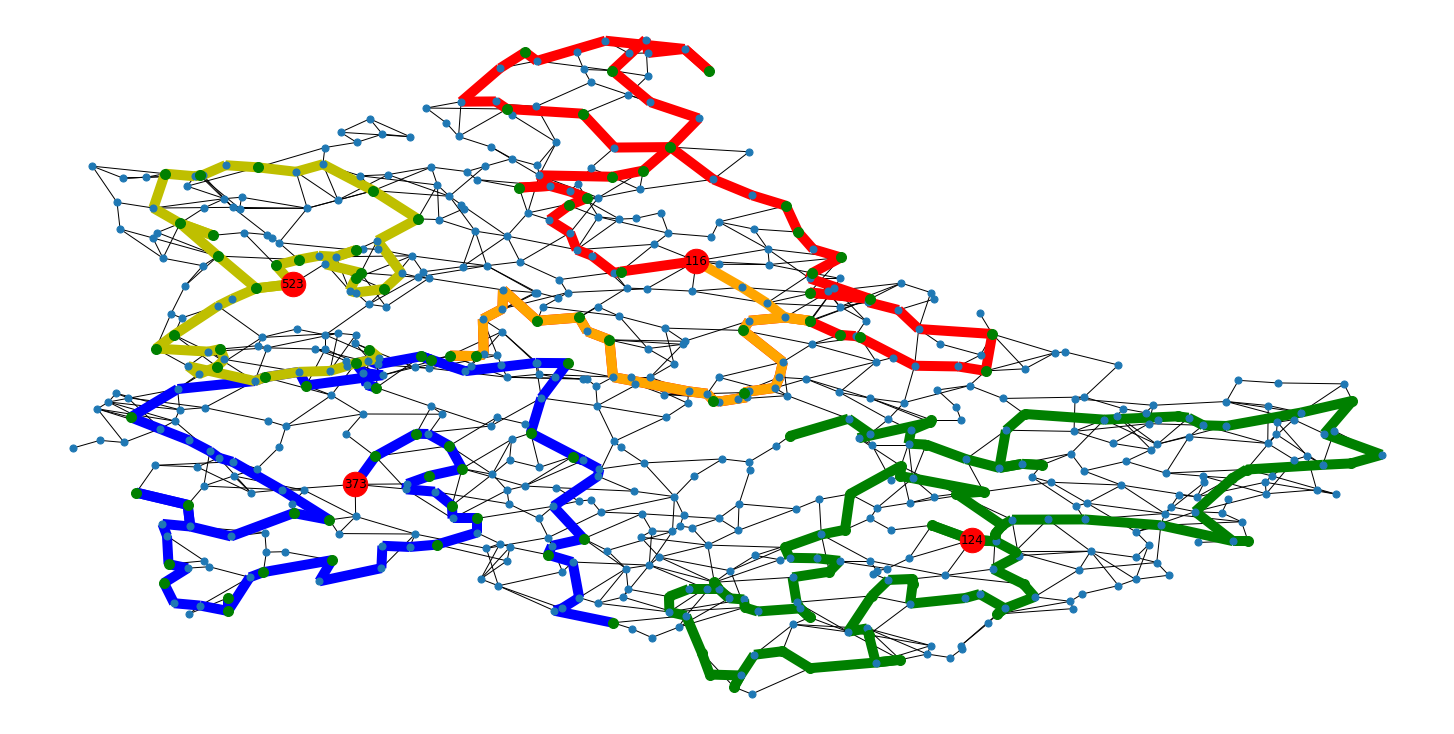

In [ ]:
#Full graph with all delivery routes from different depots clearly marked

Gnew=drawFullGraph()

Since the location dataframe is also updated with filled fuel quantity, the dataframe can be verified to confirm that all customers have their tanks full. This count matches with the total count of customers computed in the beginning of this notebook.

In [ ]:
#Checking if all customers have their tanks full

df_loc[(df_loc.is_customer==True) & (df_loc.emptiness==df_loc.filled)].count()

index          123
id             123
x              123
y              123
is_depot       123
is_customer    123
capacity       123
level          123
emptiness      123
emptinessP     123
filled         123
dtype: int64

### PRINTING RESULT AS JSON

The delivery schedule dictionary is used as input to print the result as a dictionary in the required JSON format for each depot. The JSON formatted output is also saved as a file in the same folder of the project with name "7_sao_soln1.json".

In [ ]:
#Forming the json output

result1=printResult(116, lorry116)
result2=printResult(116, lorryRem116)
result3=printResult(124, lorry124)
result4=printResult(523, lorry523)
result5=printResult(373, lorry373)
result=[]
result.extend(result1)
result.extend(result2)
result.extend(result3)
result.extend(result4)
result.extend(result5)

result.sort(key=sortByID)

groupedResult=[[{'lorry_id':k, 'loc':[x["loc"] for x in g]}] for k, g in groupby(result, key = lambda x: x["lorry_id"])]

flattened_result = [j for sublist in groupedResult for j in sublist] 

result_json=json.dumps(flattened_result)

print(result_json)

with open(os.path.join(os.environ['PROJECT_PATH'], '7_sao_soln1.json'), 'w') as outfile:
  json.dump(flattened_result, outfile)

[{"lorry_id": "116-0", "loc": [[116, 5], [31, -0.5200000000000009], [73, -0.22999999999999998], [32, -0.92], [64, -0.96], [459, -1.98], [437, -0.3899999999999988]]}, {"lorry_id": "116-1", "loc": [[116, 12], [398, -0.89], [146, -1.45], [624, -0.51], [550, -0.45999999999999996], [5, -0.09999999999999998], [113, -0.44999999999999996], [308, -0.6799999999999999], [387, -1.24], [65, -0.72], [41, -1.03], [77, -1.47], [534, -1.19], [511, -0.24], [584, -0.21999999999999997], [380, -0.15999999999999998], [243, -0.6699999999999999], [265, -0.48], [31, -0.03999999999999915], [116, 0], [116, 6.870000000000002], [528, -0.12], [437, -0.5500000000000012], [80, -0.22999999999999998], [110, -1.99], [598, -0.97], [621, -0.24], [453, -0.61], [271, -0.9], [569, -0.13], [393, -1.12]]}, {"lorry_id": "124-6", "loc": [[124, 22], [14, -0.32999999999999996], [36, -0.81], [206, -0.88], [254, -1.28], [171, -1.3199999999999998], [147, -0.8500000000000001], [397, -0.7], [476, -0.31000000000000005], [418, -0.3299999

### OUTPUT VALIDATION AND COST CALCULATION

The output computed earlier is validated using the below function which checks if fuel is delivered to all customers and if the tanks are completely filled for all the customers. The function also computes the distance covered and cost of delivery pertaining to every lorry employed for fuel delivery from the output JSON content. 

In [ ]:
totalValDist, totalValCost, validity=ValidateAndCalcCost(flattened_result)

print('Total Distance:', totalValDist, 'Total Cost:', totalValCost, 'Validity:', validity)

distance for  116-0 : 364.29334400842197
Cost of 116-0 : 2534.542142410823
distance for  116-1 : 1801.1381473140987
Cost of 116-1 : 10914.278715399361
distance for  124-6 : 1494.9049378106192
Cost of 124-6 : 9714.974695530647
distance for  124-7 : 875.4656734965071
Cost of 124-7 : 9688.478106383604
distance for  373-7 : 1809.3381950315982
Cost of 373-7 : 11677.931039389317
distance for  523-4 : 975.0782220452597
Cost of 523-4 : 5234.355994262997
cnt: 126
sum: 90.41999999999999
Req: 90.42000000000002
Total Distance: 7320.218519706505 Total Cost: 49764.56069337675 Validity: All customers are visited, Total fuel Requirement is met


##CONCLUSION
The capacitated multivehicle problems are interesting but very complex and pose an increasing challenge if the complexity of network increases. Networkx helps a lot in visualising the problem and making strategies for solution. Our aim to implement as much as possible from scratch makes it more challenging. An optimal solution to find out the delivery schedule required to deliver to all the locations in order to fill the tanks by identifying the shortest routes is identified. In order to solve Problem 1, it is concluded that Ant Colony System could be used because of the reduced cost of delivery in comparison with other stated techniques. ACS outperforms Greedy Algorithms(which has a cost of £54,669) and Genetic Algorithm(which has a cost of £56,813) as it has a lower cost of delivery  of £49,764 with 29 secs of running time which a decent number.

##REFERENCES:
Berger, J. and Barkaoui, M., 2003. A new hybrid genetic algorithm for the capacitated vehicle routing problem. In: Journal of the Operational Research Society. 1254–1262. <br><br>


Díaz, J., 2021. Simple Genetic Algorithm in Python from scratch | by Juan Díaz | Data Cat | Medium [online]. Available from: https://medium.com/datacat/simple-genetic-algorithm-in-python-from-scratch-d87cd88626c5 [Accessed 13 Jan 2021]. <br><br>


John, 2021. GitHub - johnberroa/Ant-Colony-Optimization: A Python implementation of the Ant Colony Optimization algorithm for generating solutions to such problems as the Traveling Salesman Problem. [online]. Available from: https://github.com/johnberroa/Ant-Colony-Optimization [Accessed 13 Jan 2021]. <br><br>


Mirjalili, A., 2021. (289) How the Ant Colony Optimization algorithm works - YouTube [online]. Available from: https://www.youtube.com/watch?v=783ZtAF4j5g [Accessed 13 Jan 2021]. <br><br>


Networkx Developers, 2021. Overview of NetworkX — NetworkX 2.2 documentation [online]. Available from: https://networkx.org/documentation/networkx-2.2/ [Accessed 13 Jan 2021]. <br><br>


NetworkX Developers, 2021a. networkx.algorithms.shortest_paths.weighted.multi_source_dijkstra — NetworkX 2.5 documentation [online]. Available from: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.multi_source_dijkstra.html#networkx.algorithms.shortest_paths.weighted.multi_source_dijkstra [Accessed 13 Jan 2021].
<br><br>

NetworkX Developers, 2021b. dijkstra_path — NetworkX 1.10 documentation [online]. Available from: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html#networkx.algorithms.shortest_paths.weighted.dijkstra_path [Accessed 13 Jan 2021]. <br><br>


Ombuki-Berman, B. and Hanshar, F., 2008. Using Genetic Algorithms for Multi-depot Vehicle Routing. In: Studies in Computational Intelligence. 77–99.
<br><br>

Stackoverflow, 2021. graph - Python: NetworkX Finding shortest path which contains given list of nodes - Stack Overflow [online]. Available from: https://stackoverflow.com/questions/26872592/python-networkx-finding-shortest-path-which-contains-given-list-of-nodes [Accessed 13 Jan 2021]. <br><br>


Surana, P., 2019. Benchmarking Optimization Algorithms for Capacitated Vehicle Routing Problems. San Jose, CA, USA. <br><br>


Tan, W. F., Lee, L. S., Abdul Majid, Z., and Seow, H.-V., 2012. Ant Colony Optimization for Capacitated Vehicle Routing Problem. Journal of Computer Science, 8, 846–852. <br><br>

Rodolfo Dondo, Jaime Cerdá, 2007. A cluster-based optimization approach for the multi-depot heterogeneous fleet vehicle routing problem with time windows,European Journal of Operational Research,Volume 176, Issue 3,Pages 1478-1507,ISSN 0377-2217,
https://doi.org/10.1016/j.ejor.2004.07.077.
(http://www.sciencedirect.com/science/article/pii/S0377221705008672) <br><br>


 
